In [89]:
# Input the DB to Memory
import pandas as pd
import numpy as np
print("Loading DB...")
data_file = pd.ExcelFile("globalterrorismdb_0616dist.xlsx")
#data_file = pd.ExcelFile("test_data.xlsx")
print("DB Read...")
print(data_file.sheet_names)
dfs = data_file.parse(data_file.sheet_names[0])
print("DB Parsed...")

Loading DB...
DB Read...
['Data']
DB Parsed...


In [90]:
# General Information regarding the DB
columns = dfs.columns
total_entries = len(dfs)
print("Total attributes:" + str(len(columns)))
print("Total entries:"+ str(total_entries))
#for years in dfs[columns[1]]:
#    print(years)
#print(dfs[columns[1]])
#unique_years, year_counts = np.unique(dfs[columns[1]], return_counts=True)
#print(unique_years)
#print(year_counts)

Total attributes:137
Total entries:156772


Missing year: 1993
Length matches.
Sum of year frequencies = Number of total entries


<IPython.core.display.Javascript object>


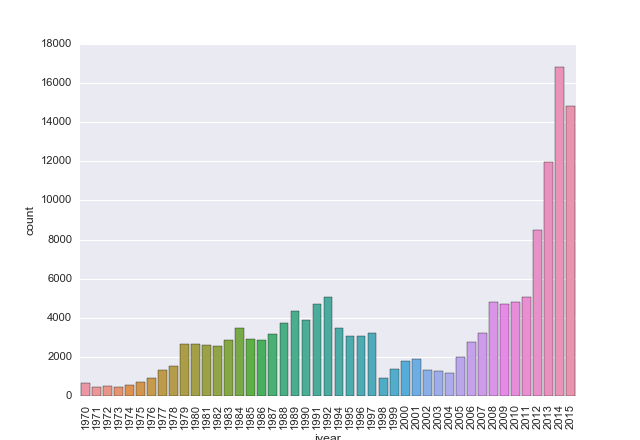

In [3]:
# Start with Column 1. Describes the year of the event. Ignoring column 0 as it's just a unique ID. 
# Maybe useful later to create dictionaries.
# Histogram shows the number of incidents per year
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
unique_years, year_counts = np.unique(dfs[columns[1]], return_counts=True)
count = 0
# Check if any year is missing from the data
for i in range(unique_years[0],unique_years[len(unique_years)-1]):
    if i != unique_years[i-1970-count]:
        print("Missing year: " + str(i))
        count = count+1
# Check if any row is missing a year
if total_entries == len(dfs[columns[1]]):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(year_counts)
if total_entries == total:
    print("Sum of year frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(dfs[columns[1]])
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[   23 12878 11824 13138 13090 14423 13107 14117 13644 12200 13591 12968
 11769]
For some incidents we do not know the exact date or month :(). We can choose to ignore this data.
Length matches.
Sum of month  frequencies = Number of total entries


<IPython.core.display.Javascript object>


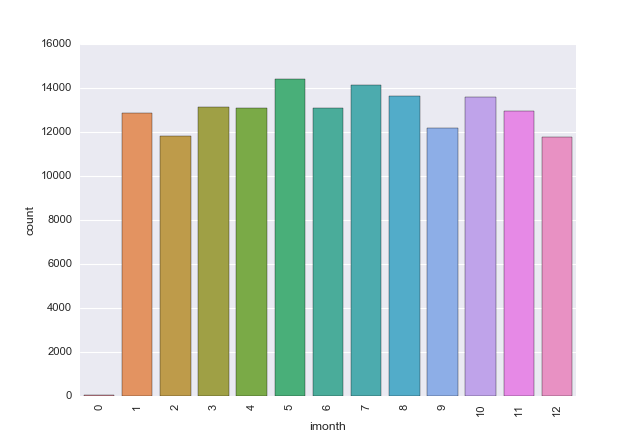

In [4]:
# Start with Column 2. Month of attack.
# Histogram shows the number of incidents per month, over all years
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
unique_months, month_counts = np.unique(dfs[columns[2]], return_counts=True)
print(unique_months)
print(month_counts)

print("For some incidents we do not know the exact date or month :(). We can choose to ignore this data.")
# Check if any month is missing in the data
for i in range(0,12):
    if i not in unique_months:
        print("Missing month: " + str(i))
# Check if any row is missing a year
if total_entries == len(dfs[columns[2]]):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(month_counts)
if total_entries == total:
    print("Sum of month  frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(dfs[columns[2]])
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[ 894 5540 5193 5202 5334 5005 4956 5150 5043 5247 5294 5155 5171 5246 5251
 5571 5319 5107 5036 5133 5132 4894 5037 4981 4944 5021 5021 5109 5164 4700
 4308 2614]
For some incidents we do not know the exact date or month :(). We can choose to ignore this data.
Length matches.
Sum of day frequencies = Number of total entries


<IPython.core.display.Javascript object>


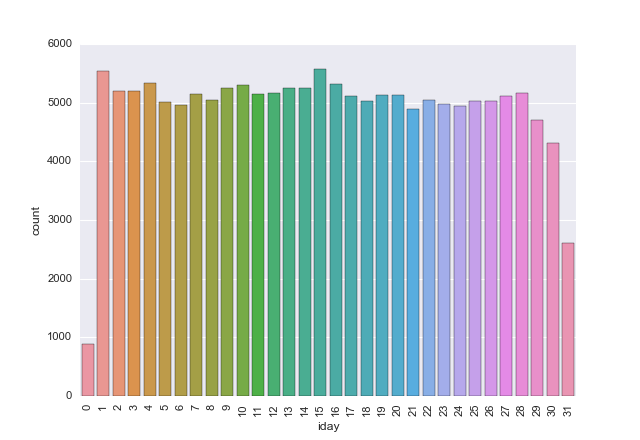

In [5]:
# Start with Column 3. Date of attack.
# Histogram shows the number of incidents per day, over all years
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[3]]
unique_days, day_counts = np.unique(curr_column, return_counts=True)
print(unique_days)
print(day_counts)

print("For some incidents we do not know the exact date or month :(). We can choose to ignore this data.")
# Check if any day is missing in the data
for i in range(0,31):
    if i not in unique_days:
        print("Missing day: " + str(i))
# Check if any row is missing a year
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(day_counts)
if total_entries == total:
    print("Sum of day frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [4]:
# Start with Column 4. Approx date. Doesn't seem too important. 
# This needs to be cleaned. Some dates are 0, some months are 0, but most have proper dates in the date field.
curr_column = dfs[columns[4]]
sec_column = dfs[columns[2]]
third_column = dfs[columns[3]]
exact_date_count = 0
require_approx_date_count = 0
for index, approx_date in enumerate(curr_column):
    if str(approx_date) == "nan":
        exact_date_count += 1
    else:
        #print("Approx date: " + str(approx_date) + " Actual Date: " + str(sec_column[index]) + "/" 
            #+ str(third_column[index]) + "/")
        if sec_column[index] == 0 or third_column[index] == 0:
            require_approx_date_count += 1
print("Approx date row count = " + str(total_entries - exact_date_count) + " Cases where we don't know date OR month = "
     + str(require_approx_date_count))

Approx date row count = 4756 Cases where we don't know date OR month = 265


Number of extended events = 6482 Number of missing resolutions = 3004


<IPython.core.display.Javascript object>


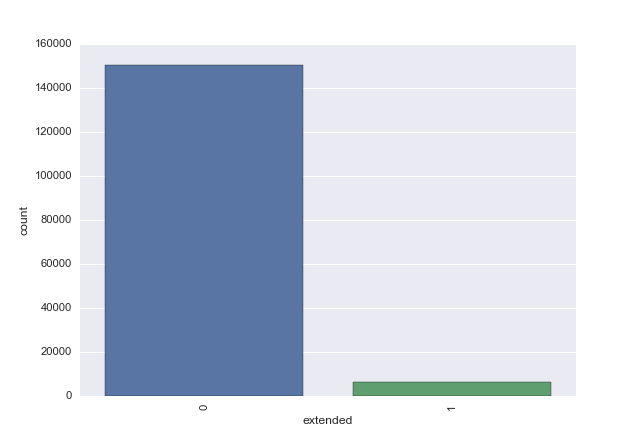

In [6]:
# Start with Column 5 and 6. IsExtendedEvent. ResolutionDate  
# These can be used together to find the duration of events with lasted more than 1 day
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[5]]
sec_column = dfs[columns[6]]
num_extended_events = 0
num_missing_resolutions = 0
for index, is_extended in enumerate(curr_column):
        if is_extended == 1:
            #print(sec_column[index])
            if str(sec_column[index]) == "nan":
                #print("Error. Extended event does not have a resolution date. Index = " + str(index))
                num_missing_resolutions += 1
        num_extended_events += is_extended
print("Number of extended events = " + str(num_extended_events) + " Number of missing resolutions = " + str(num_missing_resolutions))

ax = sns.countplot(curr_column)
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [8]:
# Start with Column 7. Country Code These codes are also used for the target/victim nationality fields.
# We should create a dict from the codebook. Some countries only have victims, and can be added manually.
curr_column = dfs[columns[7]]

unique_countries, country_counts = np.unique(curr_column, return_counts=True)
number_of_countries_code = len(unique_countries)

#Check if any row is missing the country name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(country_counts)
if total_entries == total:
    print("Sum of country frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

Length matches.
Sum of country frequencies = Number of total entries


Number of Unique countries: 206
Number of country codes matches number of country txt
Length matches.
Sum of year frequencies = Number of total entries


<IPython.core.display.Javascript object>


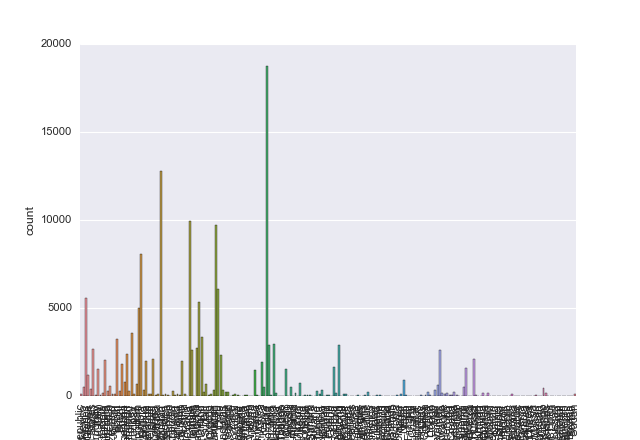

In [9]:
# Start with Column 8. Country Text.
# Histogram shows the number of incidents per country, over all years
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[8]]

unique_countries, country_counts = np.unique(curr_column, return_counts=True)
#print(unique_countries)
#print(country_counts)
number_of_countries_txt = len(unique_countries)
print("Number of Unique countries: " + str(number_of_countries_txt))
if number_of_countries_txt == number_of_countries_code:
    print("Number of country codes matches number of country txt")
#Check if any row is missing the country name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(country_counts)
if total_entries == total:
    print("Sum of year frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [10]:
# Start with Column 9. Region Code. May be redundant due to Region_txt.
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[9]]

unique_regions, region_counts = np.unique(curr_column, return_counts=True)
print(unique_regions)
print(region_counts)
number_of_regions_code = len(unique_regions)
#print("Number of Unique countries: " + str(number_of_countries_code))

#Check if any row is missing the country name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(region_counts)
if total_entries == total:
    print("Sum of region frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 3268 10337 18628   786 10360 37841   538 16020  4892 40422 13434   246]
Length matches.
Sum of region frequencies = Number of total entries


['Australasia & Oceania' 'Central America & Caribbean' 'Central Asia'
 'East Asia' 'Eastern Europe' 'Middle East & North Africa' 'North America'
 'South America' 'South Asia' 'Southeast Asia' 'Sub-Saharan Africa'
 'Western Europe']
[  246 10337   538   786  4892 40422  3268 18628 37841 10360 13434 16020]
Number of region codes matches number of region txt
Length matches.
Sum of region frequencies = Number of total entries


<IPython.core.display.Javascript object>


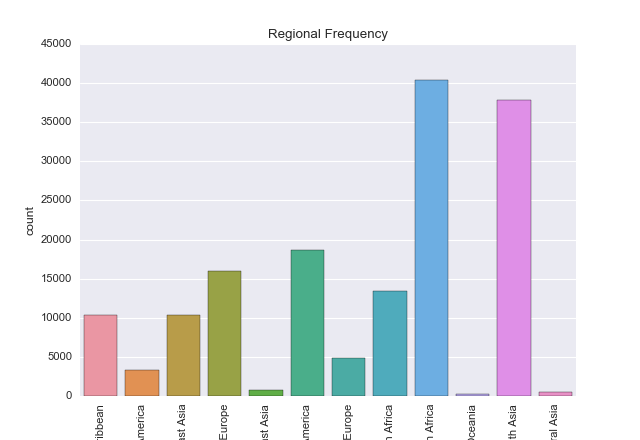

In [11]:
# Start with Column 10. Region Text. 
# Histogram shows number of events in each region over all years.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[10]]

unique_regions, region_counts = np.unique(curr_column, return_counts=True)
print(unique_regions)
print(region_counts)
number_of_regions_txt = len(unique_regions)
#print("Number of Unique countries: " + str(number_of_countries_code))
if number_of_regions_txt == number_of_regions_code:
    print("Number of region codes matches number of region txt")
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
total = np.sum(region_counts)
if total_entries == total:
    print("Sum of region frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
mp.pyplot.title("Regional Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [10]:
# Start with Column 11. Province/State Name. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.
#%matplotlib notebook
#import seaborn as sns
#import matplotlib as mp
curr_column = dfs[columns[11]]
prov_dict = {}
for index, prov in enumerate(curr_column):
    if str(prov) in prov_dict:
        prov_dict[str(prov)] += 1
    else:
        prov_dict[str(prov)] = 1

#unique_provs, prov_counts = np.unique(curr_column, return_counts=True)
#print(unique_provs)
#print(prov_counts)
print("Number of unique provs: " + str(len(prov_dict)))
#Check if any row is missing the prov name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. Total = " + str(total_entries) + " in this column = " + str(len(curr_column)))
#total = np.sum(prov_counts)
#if total_entries == total:
#    print("Sum of prov frequencies = Number of total entries")
#else:
#    print("Achtung!! Cumulative frequency mismatch.")
print("Empty provs instances = " + str(prov_dict["nan"]) + " Unknown provs instances = " + str(prov_dict["Unknown"])) 
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

Number of unique provs: 2510
Length matches.
Empty provs instances = 14520 Unknown provs instances = 3128


In [11]:
# Start with Column 12. City. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[12]]
city_dict = {}
for index, city in enumerate(curr_column):
    if str(city) in city_dict:
        city_dict[str(city)] += 1
    else:
        city_dict[str(city)] = 1

print("Number of unique cities: " + str(len(city_dict)))
#unique_cities, city_counts = np.unique(curr_column, return_counts=True)
#print(unique_provs)
#print(prov_counts)

#Check if any row is missing the prov name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
#total = np.sum(city_counts)
#if total_entries == total:
#    print("Sum of city frequencies = Number of total entries")
#else:
#    print("Achtung!! Cumulative frequency mismatch.")
print("Empty cities = " + str(city_dict["nan"]) + " Unknown provs instances = " + str(city_dict["Unknown"])) 
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

Number of unique cities: 31325
Length matches.
Empty cities = 446 Unknown provs instances = 8728


In [33]:
# Start with Column 13,14. Lat & Long. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[13]]
sec_column = dfs[columns[14]]
empty_count_lat_long = 0
unknown_count_lat_long = 0
for index, lat in enumerate(curr_column):
    if str(lat) == "nan" and str(sec_column[index]) == "nan":
        empty_count_lat_long += 1
    elif isinstance(lat, float) and isinstance(sec_column[index],float):
        continue
    else:
        print("One of lat or long is missing at index : " + str(index))
#unique_cities, city_counts = np.unique(curr_column, return_counts=True)
#print(unique_provs)
#print(prov_counts)

#Check if any row is missing the prov name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch.")
#total = np.sum(city_counts)
#if total_entries == total:
#    print("Sum of city frequencies = Number of total entries")
#else:
#    print("Achtung!! Cumulative frequency mismatch.")
print("Empty lats + longs = " + str(empty_count_lat_long)) 
#ax = sns.countplot(curr_column)
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

Length matches.
Empty lats + longs = 4519


In [39]:
# Start with Column 12,13,14. City, Lat & Long. Check if City missing and lat long present or vice versa. 
# Histogram probably not the best way to visualize this data. Maybe we can do this for every country.

curr_column = dfs[columns[12]]
sec_column = dfs[columns[13]]
city_missing_count = 0
lat_long_missing_count = 0
no_location_info_count = 0
for index, city in enumerate(curr_column):
    if str(city) == "nan" or str(city) == "Unknown":
        if str(sec_column[index]) == "nan":
            no_location_info_count += 1
        elif isinstance(sec_column[index],float):
            city_missing_count += 1
    elif str(sec_column[index]) == "nan":
        lat_long_missing_count += 1
print("Missing Cities with Lats/Longs = " + str(city_missing_count) + " Missing Lat/Longs with Cities = " 
      + str(lat_long_missing_count) + " Events with no city or Lat/Long = " + str(no_location_info_count))

Missing Cities with Lats/Longs = 7136 Missing Lat/Longs with Cities = 2481 Events with no city or Lat/Long = 2038


[1 2 3 4 5]
[126425   6235  12145   7433   4534]
Length matches.
Sum of specificity frequencies = Number of total entries


<IPython.core.display.Javascript object>


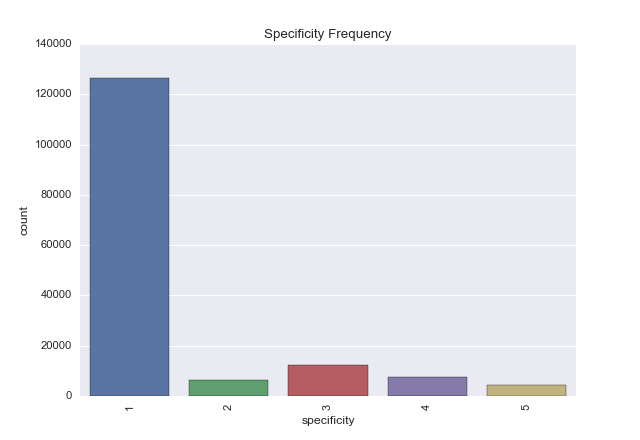

In [42]:
# Start with Column 15. Location Specificity. 1 is geolocation for city/town/village, 5 is Unknown 
# Histogram shows number of events of each specificity.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[15]]

unique_specificity, specificity_counts = np.unique(curr_column, return_counts=True)
print(unique_specificity)
print(specificity_counts)
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(specificity_counts)))
total = np.sum(specificity_counts)
if total_entries == total:
    print("Sum of specificity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
mp.pyplot.title("Specificity Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

[-9  0  1]
[    36 145842  10894]
Length matches.
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


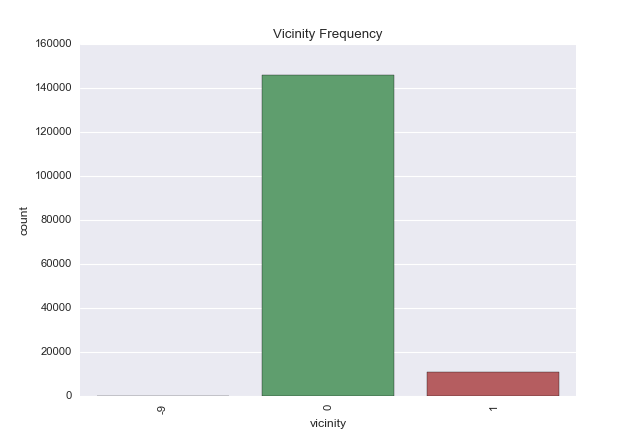

In [13]:
# Start with Column 16. Location Vicinity. 0 - Happened in that city. 1 - Happened in the vicinity of the city.
# Histogram shows number of events happening in the city and in the vicinity.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[16]]

unique_vicinity, vicinity_counts = np.unique(curr_column, return_counts=True)
print(unique_vicinity)
print(vicinity_counts)
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(vicinity_counts)))
total = np.sum(vicinity_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
mp.pyplot.title("Vicinity Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [37]:
# Start with Column 19-21. Criterion 1-3. Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1)
# Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) (CRIT2)
# Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3)
# Maybe a venn diagram would be a good idea to visualize this data

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[19]]
sec_column = dfs[columns[20]]
third_column = dfs[columns[21]]
crit_dict = {1:0,2:0,3:0,12:0,13:0,23:0,123:0,0:0}

# For checks that each column has total_entries number of entries.
for i in range(0,total_entries):
    crit_dict[1] += curr_column[i]
    crit_dict[2] += sec_column[i]
    crit_dict[3] += third_column[i]
    if curr_column[i]==1:
        if sec_column[i]==1:
            crit_dict[12] += 1
            if third_column[i]==1:
                crit_dict[123] += 1
        if third_column[i]==1:
            crit_dict[13] += 1
    elif sec_column[i]==1 and third_column[i]==1:
        crit_dict[23] += 1
    elif curr_column[i]==0 and sec_column[i]==0 and third_column[i]==0:
        crit_dict[0] += 1
print(crit_dict)

{0: 0, 1: 154942, 2: 155626, 3: 138417, 23: 1830, 123: 135441, 12: 153796, 13: 136587}


[ -9.   0.   1.  nan]
[ 13786 118758  24227      1]
Length matches.
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


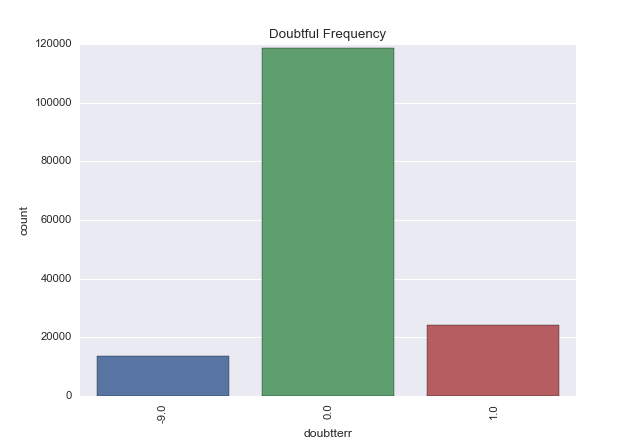

In [38]:
# Start with Column 22. Doubt Whether Terrorism. 0 - No doubt. 1 - There is doubt. -9 - No data.
# Histogram shows number of events with and without doubt.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[22]]

unique_doubterr, doubt_counts = np.unique(curr_column, return_counts=True)
print(unique_doubterr)
print(doubt_counts)
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(doubt_counts)))
total = np.sum(doubt_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")
ax = sns.countplot(curr_column)
mp.pyplot.title("Doubtful Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

Doubtful case without classification. At index : 13261
Doubtful case without classification. At index : 16888
Doubtful case without classification. At index : 17381
Doubtful case without classification. At index : 18570
Doubtful case without classification. At index : 67766
Doubtful case without classification. At index : 68014
Doubtful case without classification. At index : 69650
Doubtful case without classification. At index : 84689
Doubtful case without classification. At index : 90234
Length matches.
Sum of Vicinity frequencies = Number of total entries
Number of missing classes: 132536
Number of events with classes: 24236


<IPython.core.display.Javascript object>


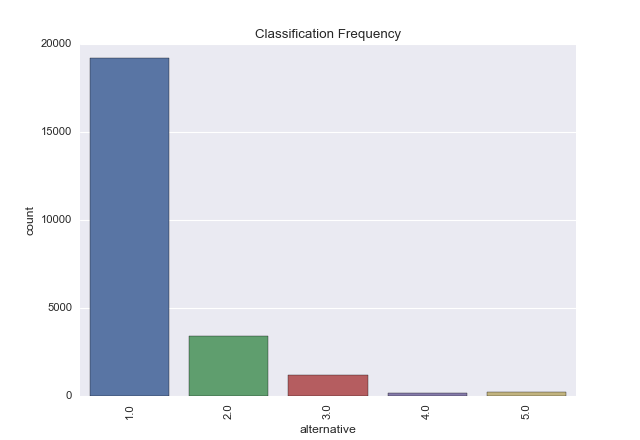

In [43]:
# Start with Column 23. Alternate classification if Doubterr is 1. Available only after 1997
# Histogram shows number of events with and without doubt.
#1= Insurgency/Guerilla Action
#2= Other Crime Type
#3= Inter/Intra‐Group Conflict
#4= Lack of Intentionality
#5= State Actors (systematically coded post‐2012)

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[23]]
sec_column = dfs[columns[22]]
unique_classifications, classification_counts = np.unique(curr_column, return_counts=True)
#print(unique_classifications)
#print(classification_counts)
nan_count = 0
for index, classification in enumerate(curr_column):
    if str(classification) == "nan":
        nan_count += 1
    else:
        if sec_column[index]!=1:
            print("Doubtful case without classification. At index : " + str(index))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(classification_counts)))
total = np.sum(classification_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing classes: " + str(nan_count))
print("Number of events with classes: " + str(total_entries - nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Classification Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


Length matches.
Sum of Vicinity frequencies = Number of total entries
Number of missing data: 0


<IPython.core.display.Javascript object>


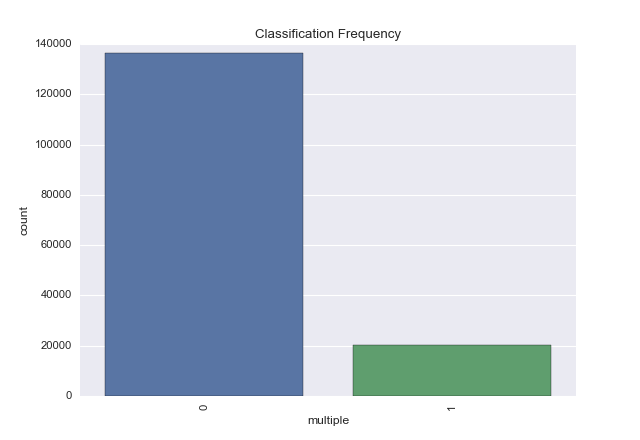

In [49]:
# Start with Column 25. Multiple events. Is the event part of multiple related events. Available systematically after 1997
# Histogram shows number of events connected to other events
# Column 136 holds the list of GTD IDs of related events as a comma separated string. Must be parsed.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[25]]
sec_column = dfs[columns[136]]
is_part_of_multiple, multiple_counts = np.unique(curr_column, return_counts=True)
nan_count = 0
for index, ismultiple in enumerate(curr_column):
    if str(ismultiple) == "nan":
        nan_count += 1
    elif sec_column[index] == "nan":
        print("Part of multiple event but GIDs not provided at index = " + str(index))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(multiple_counts)))
total = np.sum(multiple_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing data: " + str(nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Classification Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


Length matches.
Sum of Vicinity frequencies = Number of total entries
Number of missing data: 0


<IPython.core.display.Javascript object>


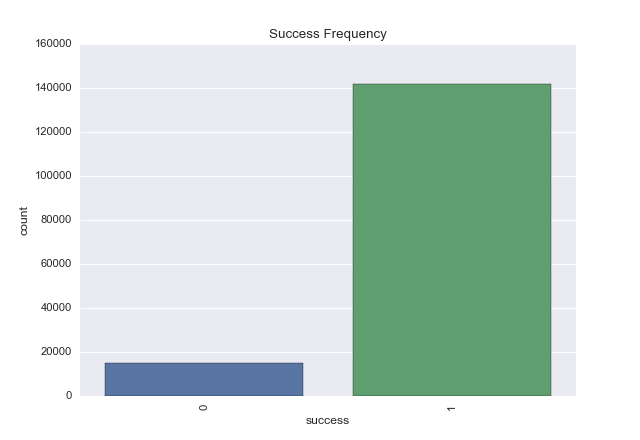

In [53]:
# Start with Column 26. Is the event considered a success. Criterion for success mentioned in codebook
# Histogram shows number of success/failed events

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[26]]
is_success, success_counts = np.unique(curr_column, return_counts=True)
nan_count = 0
for index, success in enumerate(curr_column):
    if str(success) == "nan":
        nan_count += 1
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(success_counts)))
total = np.sum(success_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing data: " + str(nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Success Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


Length matches.
Sum of Vicinity frequencies = Number of total entries
Number of missing data: 0


<IPython.core.display.Javascript object>


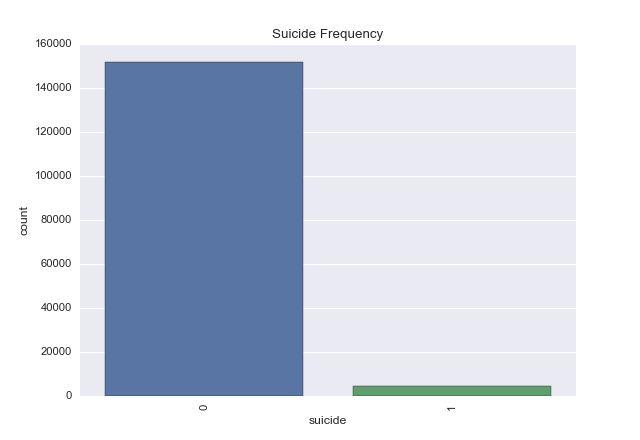

In [54]:
# Start with Column 26. Is the event a suicide attack.
# Histogram shows number of success/failed events

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[27]]
is_suicide, suicide_counts = np.unique(curr_column, return_counts=True)
nan_count = 0
for index, suicide in enumerate(curr_column):
    if str(suicide) == "nan":
        nan_count += 1
    
#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(suicide_counts)))
total = np.sum(suicide_counts)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing data: " + str(nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Suicide Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


[1 2 3 4 5 6 7 8 9]
[17582 37554 75963   556   835  9115  8849   828  5490]
['Armed Assault' 'Assassination' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Hijacking'
 'Hostage Taking (Barricade Incident)' 'Hostage Taking (Kidnapping)'
 'Unarmed Assault' 'Unknown']
[37554 17582 75963  8849   556   835  9115   828  5490]
Number of missing data in code: 0
Number of missing data in txt: 0
Length matches.
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


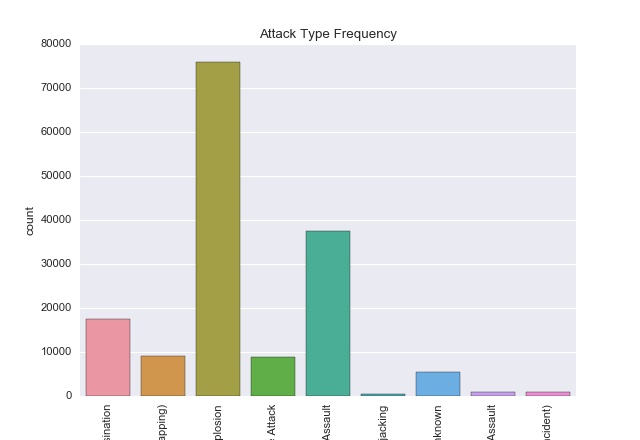

In [56]:
# Start with Column 28 and 29. Attack_type and attack_type_txt

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[28]]
sec_column = dfs[columns[29]]

unique_attacks, attack_counts = np.unique(curr_column, return_counts=True)
unique_attacks_txt, attack_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_attacks)
print(attack_counts)
print(unique_attacks_txt)
print(attack_counts_txt)

nan_count = 0
for index, attacktype in enumerate(curr_column):
    if str(attacktype) == "nan":
        nan_count += 1
print("Number of missing data in code: " + str(nan_count))
nan_count = 0
for index, attacktypetxt in enumerate(sec_column):
    if str(attacktypetxt) == "nan":
        nan_count += 1
print("Number of missing data in txt: " + str(nan_count))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(attack_counts_txt)))
total = np.sum(attack_counts_txt)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(sec_column)
mp.pyplot.title("Attack Type Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


In [61]:
# Start with Column 30 and 31. Attack_type_2 and attack_type_2_txt

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[30]]
sec_column = dfs[columns[31]]
print(columns[30])
print(columns[31])
attack2_dict = {}
attack2_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Attack text present but attack code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Attack code present but attack text is .. Index = " + str(index))
    if str(curr_column[index]) in attack2_dict:
        attack2_dict[str(curr_column[index])] += 1
    else: 
        attack2_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in attack2_txt_dict:
        attack2_txt_dict[str(sec_column[index])] += 1
    else: 
        attack2_txt_dict[str(sec_column[index])] = 1
         
print(attack2_dict)
print(attack2_txt_dict)

attacktype2
attacktype2_txt
{'7.0': 1083, '5.0': 34, '9.0': 3, '2.0': 2699, 'nan': 151806, '8.0': 36, '1.0': 161, '3.0': 448, '4.0': 12, '6.0': 490}
{'Unknown': 3, 'Hijacking': 12, 'Armed Assault': 2699, '.': 151806, 'Assassination': 161, 'Unarmed Assault': 36, 'Hostage Taking (Kidnapping)': 490, 'Hostage Taking (Barricade Incident)': 34, 'Facility/Infrastructure Attack': 1083, 'Bombing/Explosion': 448}


In [63]:
# Start with Column 32 and 33. Attack_type_3 and attack_type_3_txt

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[32]]
sec_column = dfs[columns[33]]
print(columns[30])
print(columns[31])
attack3_dict = {}
attack3_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Attack text present but attack code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Attack code present but attack text is .. Index = " + str(index))
    if str(curr_column[index]) in attack3_dict:
        attack3_dict[str(curr_column[index])] += 1
    else: 
        attack3_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in attack3_txt_dict:
        attack3_txt_dict[str(sec_column[index])] += 1
    else: 
        attack3_txt_dict[str(sec_column[index])] = 1
         
print(attack3_dict)
print(attack3_txt_dict)

attacktype2
attacktype2_txt
{'7.0': 122, '5.0': 2, '2.0': 102, 'nan': 156460, '8.0': 8, '1.0': 4, '3.0': 16, '4.0': 4, '6.0': 54}
{'Hijacking': 4, 'Armed Assault': 102, '.': 156460, 'Assassination': 4, 'Unarmed Assault': 8, 'Hostage Taking (Kidnapping)': 54, 'Hostage Taking (Barricade Incident)': 2, 'Bombing/Explosion': 16, 'Facility/Infrastructure Attack': 122}


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[18882 19251 21241 22924   262  1303  3333  3947   294  2658   319   864
   464 35877  3891   936  2540   421  6419  3805  5504  1637]
['Abortion Related' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Food or Water Supply' 'Government (Diplomatic)'
 'Government (General)' 'Journalists & Media' 'Maritime' 'Military' 'NGO'
 'Other' 'Police' 'Private Citizens & Property'
 'Religious Figures/Institutions' 'Telecommunication'
 'Terrorists/Non-State Militia' 'Tourists' 'Transportation' 'Unknown'
 'Utilities' 'Violent Political Party']
[  262  1303 18882  3947   294  3333 19251  2658   319 22924   864   464
 21241 35877  3891   936  2540   421  6419  3805  5504  1637]
Number of missing data in code: 0
Number of missing data in txt: 0
Length matches.
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


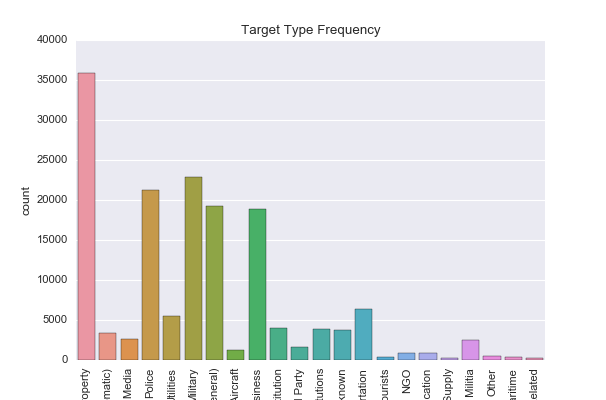

In [64]:
# Start with Column 34 and 35. Target_type and target_type_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[34]]
sec_column = dfs[columns[35]]

unique_targs, targ_counts = np.unique(curr_column, return_counts=True)
unique_targs_txt, targ_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_targs)
print(targ_counts)
print(unique_targs_txt)
print(targ_counts_txt)

nan_count = 0
for index, targtype in enumerate(curr_column):
    if str(targtype) == "nan":
        nan_count += 1
print("Number of missing data in code: " + str(nan_count))
nan_count = 0
for index, targtypetxt in enumerate(sec_column):
    if str(attacktypetxt) == "nan":
        nan_count += 1
print("Number of missing data in txt: " + str(nan_count))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(targ_counts_txt)))
total = np.sum(targ_counts_txt)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(sec_column)
mp.pyplot.title("Target Type Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


In [77]:
# Start with Column 36 and 37. Target subtype and text.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[36]]
sec_column = dfs[columns[37]]
print(columns[36])
print(columns[37])
targ_subtype_dict = {}
targ_subtype_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Target subtype text present but target code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Targer subtype code present but targer text is .. Index = " + str(index))
    if str(curr_column[index]) in targ_subtype_dict:
        targ_subtype_dict[str(curr_column[index])] += 1
    else: 
        targ_subtype_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in targ_subtype_txt_dict:
        targ_subtype_txt_dict[str(sec_column[index])] += 1
    else: 
        targ_subtype_txt_dict[str(sec_column[index])] = 1
         
print(targ_subtype_dict)
print(targ_subtype_txt_dict)
if sum(targ_subtype_dict.values())==total_entries:
       print("Num entries match")
if sum(targ_subtype_txt_dict.values())==total_entries:
       print("Num txt entries match")
print("Number of empty values: " + str(targ_subtype_txt_dict["."]))

targsubtype1
targsubtype1_txt
{'111.0': 101, '34.0': 6148, '80.0': 240, '17.0': 395, '95.0': 38, '90.0': 558, '77.0': 2406, '78.0': 451, '102.0': 138, '57.0': 92, '98.0': 60, '19.0': 847, '74.0': 2297, '29.0': 7496, '76.0': 2436, '49.0': 2740, '48.0': 729, '97.0': 238, '68.0': 2034, '65.0': 349, '110.0': 319, '21.0': 4509, '75.0': 4964, '107.0': 3868, '63.0': 42, '62.0': 519, '45.0': 922, '8.0': 980, '47.0': 817, '55.0': 385, '12.0': 876, '73.0': 2538, '23.0': 4375, '85.0': 1115, '81.0': 142, '67.0': 9585, '31.0': 159, '88.0': 117, '37.0': 942, '56.0': 92, '100.0': 2092, '30.0': 21, '27.0': 4054, '39.0': 564, 'nan': 8155, '35.0': 1675, '15.0': 5668, '94.0': 1580, '69.0': 2055, '106.0': 539, '93.0': 858, '5.0': 1261, '87.0': 312, '28.0': 237, '51.0': 72, '64.0': 19, '2.0': 1631, '20.0': 586, '99.0': 2663, '101.0': 510, '71.0': 1638, '7.0': 3675, '10.0': 358, '82.0': 747, '104.0': 233, '6.0': 617, '86.0': 2295, '89.0': 76, '66.0': 37, '61.0': 266, '33.0': 8, '26.0': 323, '42.0': 413, '10

In [78]:
# Start with Column 40 and 41. Nationality of target and nationality text target

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[40]]
sec_column = dfs[columns[41]]
print(columns[40])
print(columns[41])
nationality_dict = {}
nationality_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Nationality text present but Nationality code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Nationality code present but Nationality text is .. Index = " + str(index))
    if str(curr_column[index]) in nationality_dict:
        nationality_dict[str(curr_column[index])] += 1
    else: 
        nationality_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in nationality_txt_dict:
        nationality_txt_dict[str(sec_column[index])] += 1
    else: 
        nationality_txt_dict[str(sec_column[index])] = 1
         
#print(nationality_dict)
print(nationality_txt_dict)
if sum(nationality_dict.values())==total_entries:
       print("Num entries match")
if sum(nationality_txt_dict.values())==total_entries:
       print("Num txt entries match")
print("Number of empty values: " + str(nationality_txt_dict["."]))

natlty1
natlty1_txt
{'Japan': 454, 'Indonesia': 664, 'Uzbekistan': 19, 'Nicaragua': 1960, 'Austria': 80, 'Myanmar': 357, 'Iran': 801, 'Djibouti': 16, 'Paraguay': 90, 'Albania': 94, 'Vietnam': 33, 'Netherlands': 142, 'Niger': 103, 'Commonwealth of Independent States': 1, 'Cambodia': 203, 'Democratic Republic of the Congo': 410, 'Dominican Republic': 86, 'Bermuda': 3, 'Cuba': 94, 'El Salvador': 5212, 'Brazil': 240, 'Serbia': 16, 'Turkey': 3869, 'Man, Isle of': 1, 'Oman': 2, 'Portugal': 140, 'Azerbaijan': 42, 'Bulgaria': 60, 'Iraq': 18284, 'Sierra Leone': 63, 'Malta': 17, 'Equatorial Guinea': 2, 'Republic of the Congo': 18, 'North Korea': 10, 'Togo': 44, 'Tajikistan': 134, 'Serbia-Montenegro': 256, 'Uruguay': 61, 'St. Lucia': 1, 'Saudi Arabia': 235, 'Ethiopia': 154, 'Greece': 891, 'Comoros': 6, 'Zaire': 32, 'Lesotho': 23, 'Benin': 8, 'Sweden': 102, 'Kosovo': 33, 'Argentina': 640, 'Mauritius': 2, 'Tanzania': 47, 'Hong Kong': 17, 'Uganda': 335, 'Russia': 2219, 'Bahrain': 166, 'Nigeria': 274

targtype2
targtype2_txt
[  1.   2.   3. ...,  nan  nan  nan]
[764 419 908 ...,   1   1   1]
['.' 'Abortion Related' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Food or Water Supply' 'Government (Diplomatic)'
 'Government (General)' 'Journalists & Media' 'Maritime' 'Military' 'NGO'
 'Other' 'Police' 'Private Citizens & Property'
 'Religious Figures/Institutions' 'Telecommunication'
 'Terrorists/Non-State Militia' 'Tourists' 'Transportation' 'Unknown'
 'Utilities' 'Violent Political Party']
[147863      3     34    764    187      7    131    419     96     11
    983     84     43    908   4363    166     33    332     50    124
     77     69     25]
Number of missing data in code: 147863
Number of missing data in txt: 156772
Length matches.
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


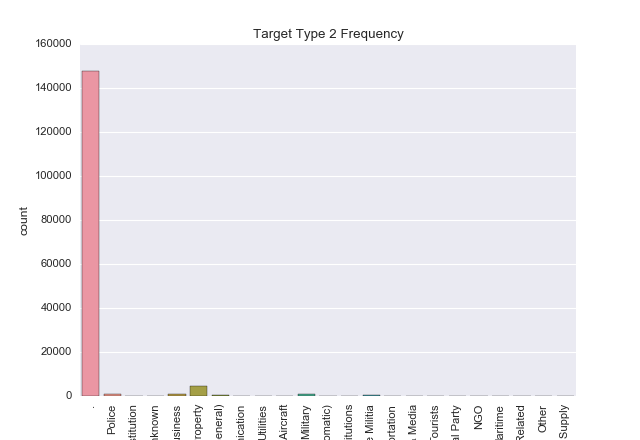

In [82]:
# Start with Column 42 and 43. Target_type2 and target_type_txt2. Second target of the attack.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[42]]
sec_column = dfs[columns[43]]

unique_targs, targ_counts = np.unique(curr_column, return_counts=True)
unique_targs_txt, targ_counts_txt = np.unique(sec_column, return_counts=True)
print(columns[42])
print(columns[43])
print(unique_targs)
print(targ_counts)
print(unique_targs_txt)
print(targ_counts_txt)

nan_count = 0
for index, targtype in enumerate(curr_column):
    if str(targtype) == "nan":
        nan_count += 1
print("Number of missing data in code: " + str(nan_count))
nan_count = 0
for index, targtypetxt in enumerate(sec_column):
    if str(attacktypetxt) == ".":
        nan_count += 1
print("Number of missing data in txt: " + str(nan_count))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(targ_counts_txt)))
total = np.sum(targ_counts_txt)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(sec_column)
mp.pyplot.title("Target Type 2 Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


In [83]:
# Start with Column 44 and 45. Target subtype2 and text.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[44]]
sec_column = dfs[columns[45]]
print(columns[44])
print(columns[45])
targ_subtype2_dict = {}
targ_subtype2_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Target subtype 2 text present but target subtype 2 code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Targer subtype 2 code present but target subtype 2 text is .. Index = " + str(index))
    if str(curr_column[index]) in targ_subtype2_dict:
        targ_subtype2_dict[str(curr_column[index])] += 1
    else: 
        targ_subtype2_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in targ_subtype2_txt_dict:
        targ_subtype2_txt_dict[str(sec_column[index])] += 1
    else: 
        targ_subtype2_txt_dict[str(sec_column[index])] = 1
         
print(targ_subtype2_dict)
print(targ_subtype2_txt_dict)
if sum(targ_subtype2_dict.values())==total_entries:
       print("Num entries match")
if sum(targ_subtype2_txt_dict.values())==total_entries:
       print("Num txt entries match")
print("Number of empty values: " + str(targ_subtype2_txt_dict["."]))

targsubtype2
targsubtype2_txt
{'111.0': 1, '34.0': 586, '80.0': 1, '17.0': 12, '90.0': 19, '77.0': 309, '78.0': 38, '102.0': 4, '57.0': 3, '98.0': 4, '19.0': 22, '74.0': 124, '29.0': 119, '76.0': 184, '49.0': 85, '48.0': 85, '59.0': 1, '68.0': 218, '65.0': 16, '8.0': 43, '21.0': 93, '75.0': 109, '107.0': 29, '63.0': 10, '62.0': 56, '45.0': 34, '110.0': 3, '47.0': 26, '55.0': 23, '12.0': 56, '73.0': 128, '53.0': 15, '85.0': 47, '81.0': 9, '67.0': 2673, '31.0': 2, '88.0': 3, '37.0': 31, '56.0': 10, '100.0': 30, '27.0': 157, '39.0': 28, 'nan': 148303, '35.0': 27, '15.0': 99, '94.0': 276, '69.0': 97, '106.0': 21, '9.0': 19, '5.0': 30, '87.0': 28, '28.0': 3, '51.0': 3, '72.0': 9, '2.0': 80, '20.0': 22, '99.0': 47, '101.0': 23, '71.0': 271, '7.0': 161, '10.0': 16, '82.0': 13, '104.0': 3, '6.0': 41, '86.0': 90, '89.0': 3, '61.0': 9, '33.0': 1, '26.0': 4, '42.0': 3, '108.0': 19, '96.0': 9, '3.0': 58, '4.0': 38, '11.0': 19, '50.0': 10, '58.0': 3, '13.0': 20, '103.0': 7, '18.0': 122, '84.0': 46,

In [85]:
# Start with Column 48 and 49. Nationality of second target and nationality text second target

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[48]]
sec_column = dfs[columns[49]]
print(columns[48])
print(columns[49])
nationality2_dict = {}
nationality2_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Nationality 2 text present but Nationality 2 code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Nationality 2 code present but Nationality 2 text is .. Index = " + str(index))
    if str(curr_column[index]) in nationality2_dict:
        nationality2_dict[str(curr_column[index])] += 1
    else: 
        nationality2_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in nationality2_txt_dict:
        nationality2_txt_dict[str(sec_column[index])] += 1
    else: 
        nationality2_txt_dict[str(sec_column[index])] = 1
         
#print(nationality_dict)
print(nationality2_txt_dict)
if sum(nationality2_dict.values())==total_entries:
       print("Num entries match")
if sum(nationality2_txt_dict.values())==total_entries:
       print("Num txt entries match")
print("Number of empty values: " + str(nationality2_txt_dict["."]))

natlty2
natlty2_txt
{'Australia': 9, 'Burkina Faso': 1, 'Eritrea': 1, 'Ukraine': 70, 'Guinea': 6, 'Taiwan': 1, 'Corsica': 1, 'Japan': 7, 'Hong Kong': 2, 'Northern Ireland': 45, 'Venezuela': 7, 'Nicaragua': 6, 'Israel': 115, 'International': 78, 'Syria': 181, 'Iran': 29, 'Trinidad and Tobago': 1, 'Djibouti': 1, 'Paraguay': 2, 'Albania': 3, 'Togo': 2, 'Madagascar': 1, 'Netherlands': 19, 'Bahrain': 3, 'Niger': 9, 'Nepal': 76, 'Cambodia': 3, 'Tunisia': 7, 'Haiti': 6, 'Chile': 6, 'Indonesia': 79, '.': 148172, 'Fiji': 3, 'New Caledonia': 2, 'Puerto Rico': 2, 'Uzbekistan': 7, 'Kosovo': 4, 'Uruguay': 2, 'El Salvador': 9, 'Brazil': 6, 'Lebanon': 71, 'Turkey': 139, 'Nigeria': 232, 'France': 93, 'Myanmar': 16, 'Portugal': 7, 'South Africa': 12, 'Mozambique': 9, 'Azerbaijan': 2, 'Bulgaria': 1, 'Ireland': 7, 'Iraq': 1480, 'Sierra Leone': 4, 'Asian': 2, 'Malta': 1, 'Equatorial Guinea': 1, 'Kuwait': 4, 'Slovak Republic': 1, 'Democratic Republic of the Congo': 62, 'Serbia-Montenegro': 13, 'Cuba': 5, '

targtype3
targtype3_txt
[  1.   2.   3. ...,  nan  nan  nan]
[103  66  86 ...,   1   1   1]
['.' 'Airports & Aircraft' 'Business' 'Educational Institution'
 'Food or Water Supply' 'Government (Diplomatic)' 'Government (General)'
 'Journalists & Media' 'Maritime' 'Military' 'NGO' 'Other' 'Police'
 'Private Citizens & Property' 'Religious Figures/Institutions'
 'Telecommunication' 'Terrorists/Non-State Militia' 'Tourists'
 'Transportation' 'Utilities' 'Violent Political Party']
[155840      8    103     12      1     24     66     13      1     72
     21      7     86    413     39     12     19     18     10      4
      3]
Number of missing data in code: 155840
Number of missing data in txt: 156772
Length matches.
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


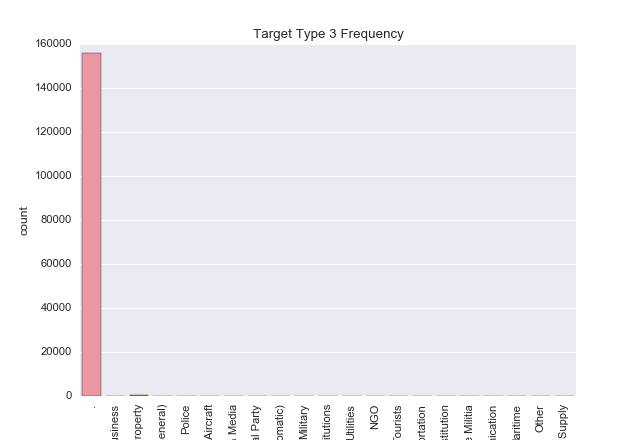

In [86]:
# Start with Column 50 and 51. Target_type3 and target_type_txt3. Third target of the attack.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[50]]
sec_column = dfs[columns[51]]

unique_targs, targ_counts = np.unique(curr_column, return_counts=True)
unique_targs_txt, targ_counts_txt = np.unique(sec_column, return_counts=True)
print(columns[50])
print(columns[51])
print(unique_targs)
print(targ_counts)
print(unique_targs_txt)
print(targ_counts_txt)

nan_count = 0
for index, targtype in enumerate(curr_column):
    if str(targtype) == "nan":
        nan_count += 1
print("Number of missing data in code: " + str(nan_count))
nan_count = 0
for index, targtypetxt in enumerate(sec_column):
    if str(attacktypetxt) == ".":
        nan_count += 1
print("Number of missing data in txt: " + str(nan_count))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(targ_counts_txt)))
total = np.sum(targ_counts_txt)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(sec_column)
mp.pyplot.title("Target Type 3 Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


In [87]:
# Start with Column 52 and 53. Target subtype2 and text.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[52]]
sec_column = dfs[columns[53]]
print(columns[52])
print(columns[53])
targ_subtype3_dict = {}
targ_subtype3_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Target subtype 3 text present but target subtype 3 code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Targer subtype 3 code present but target subtype 3 text is .. Index = " + str(index))
    if str(curr_column[index]) in targ_subtype3_dict:
        targ_subtype3_dict[str(curr_column[index])] += 1
    else: 
        targ_subtype3_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in targ_subtype3_txt_dict:
        targ_subtype3_txt_dict[str(sec_column[index])] += 1
    else: 
        targ_subtype3_txt_dict[str(sec_column[index])] = 1
         
print(targ_subtype3_dict)
print(targ_subtype3_txt_dict)
if sum(targ_subtype3_dict.values())==total_entries:
       print("Num entries match")
if sum(targ_subtype3_txt_dict.values())==total_entries:
       print("Num txt entries match")
print("Number of empty values: " + str(targ_subtype3_txt_dict["."]))

targsubtype3
targsubtype3_txt
{'34.0': 50, '80.0': 1, '36.0': 3, '90.0': 7, '77.0': 40, '78.0': 7, '57.0': 1, '2.0': 11, '74.0': 7, '29.0': 2, '76.0': 34, '49.0': 4, '48.0': 5, '4.0': 1, '68.0': 12, '65.0': 1, '8.0': 6, '21.0': 29, '75.0': 12, '107.0': 2, '62.0': 14, '45.0': 3, '47.0': 10, '55.0': 1, '12.0': 4, '73.0': 21, '23.0': 4, '85.0': 8, '81.0': 1, '67.0': 240, '88.0': 1, '37.0': 2, '100.0': 2, '27.0': 3, '39.0': 8, 'nan': 155912, '35.0': 2, '15.0': 4, '94.0': 12, '69.0': 7, '9.0': 1, '5.0': 1, '87.0': 25, '72.0': 2, '19.0': 1, '20.0': 1, '99.0': 4, '101.0': 3, '71.0': 9, '7.0': 19, '10.0': 3, '82.0': 4, '104.0': 1, '6.0': 7, '86.0': 6, '89.0': 1, '61.0': 1, '26.0': 2, '42.0': 5, '108.0': 1, '96.0': 2, '3.0': 9, '64.0': 2, '11.0': 1, '50.0': 2, '13.0': 4, '18.0': 23, '84.0': 3, '44.0': 1, '46.0': 7, '79.0': 4, '25.0': 67, '53.0': 3, '63.0': 1, '22.0': 8, '54.0': 1, '97.0': 16, '93.0': 7, '70.0': 2, '109.0': 1, '60.0': 1, '92.0': 1, '1.0': 7, '14.0': 3, '24.0': 4, '52.0': 1}
{'Re

In [94]:
# Start with Column 56 and 57. Nationality of third target and nationality text third target

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr_column = dfs[columns[56]]
sec_column = dfs[columns[57]]
print(columns[56])
print(columns[57])
nationality3_dict = {}
nationality3_txt_dict = {}

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Nationality 3 text present but Nationality 3 code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Nationality 3 code present but Nationality 3 text is .. Index = " + str(index))
    if str(curr_column[index]) in nationality3_dict:
        nationality3_dict[str(curr_column[index])] += 1
    else: 
        nationality3_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) in nationality3_txt_dict:
        nationality3_txt_dict[str(sec_column[index])] += 1
    else: 
        nationality3_txt_dict[str(sec_column[index])] = 1
         
#print(nationality_dict)
print(nationality3_txt_dict)
if sum(nationality2_dict.values())==total_entries:
       print("Num entries match")
if sum(nationality2_txt_dict.values())==total_entries:
       print("Num txt entries match")
print("Number of empty values: " + str(nationality2_txt_dict["."]))

natlty3
natlty3_txt
{'Mozambique': 1, 'Japan': 2, 'Indonesia': 30, 'Northern Ireland': 2, 'Israel': 5, 'International': 10, 'Syria': 14, 'Iran': 3, 'Albania': 1, 'Madagascar': 1, 'Netherlands': 2, 'Ghana': 1, 'Niger': 1, 'Somalia': 30, 'Kazakhstan': 1, '.': 155868, 'Nepal': 13, 'Ukraine': 3, 'Yemen': 7, 'Cuba': 1, 'El Salvador': 1, 'Lebanon': 9, 'Turkey': 18, 'Nigeria': 37, 'France': 18, 'South Africa': 5, 'Azerbaijan': 1, 'Bulgaria': 2, 'Ireland': 2, 'Iraq': 105, 'Sierra Leone': 1, 'Equatorial Guinea': 1, 'Kuwait': 1, 'Australia': 4, 'Democratic Republic of the Congo': 10, 'Serbia-Montenegro': 2, 'Georgia': 7, 'Mexico': 2, 'Saudi Arabia': 1, 'New Zealand': 2, 'Ethiopia': 3, 'Afghanistan': 92, 'Greece': 2, 'Turkmenistan': 1, 'Denmark': 1, 'Sweden': 1, 'South Sudan': 3, 'Argentina': 1, 'Guinea': 1, 'Yugoslavia': 1, 'Uganda': 2, 'Russia': 10, 'Zimbabwe': 2, 'Ivory Coast': 6, 'Canada': 3, 'Great Britain': 17, 'United States': 21, 'Macedonia': 1, 'Pakistan': 47, 'Switzerland': 1, 'Ecuador'

gname
gsubname
Num gname entries match
Num gnamesub entries match
Number of Unknown values in gname: 71922
Number of Unknown values in gname_sub: 152097


<IPython.core.display.Javascript object>


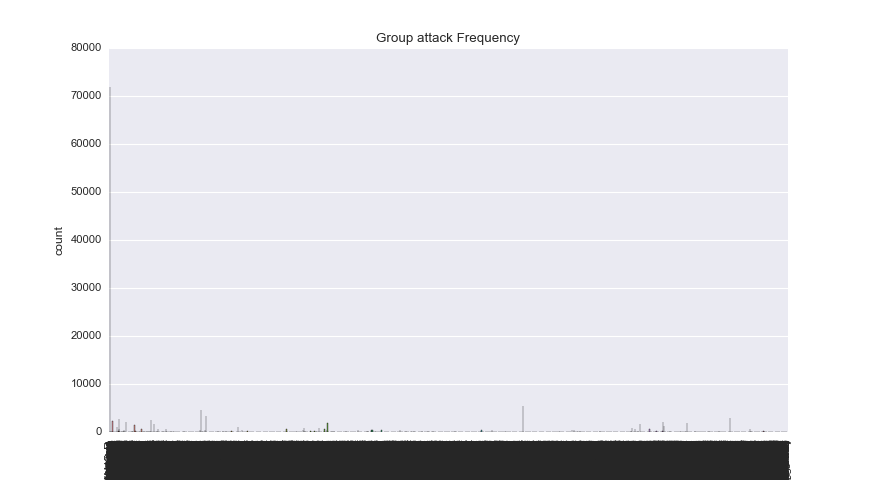

In [160]:
# Start with Column 58 and 59. Name of the perpetrator group. Subfaction of the group.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
import operator
curr = columns[58]
sec = columns[59]
curr_column = dfs[curr]
sec_column = dfs[sec]
print(curr)
print(sec)
gname_dict = {}
gname_sub_dict = {}
nan_count = 0
for index in range(0,total_entries):
    if str(curr_column[index]) in gname_dict:
        gname_dict[str(curr_column[index])] += 1
    else: 
        gname_dict[str(curr_column[index])] = 1
    if str(sec_column[index]) != "nan":
        if str(curr_column[index]) + "++" + str(sec_column[index]) in gname_sub_dict:
            gname_sub_dict[str(curr_column[index]) + "++" + str(sec_column[index])] += 1
        else: 
            gname_sub_dict[str(curr_column[index]) + "++" + str(sec_column[index])] = 1
    else:
        nan_count += 1
         
#print(sorted(gname_dict.items(), key=operator.itemgetter(1), reverse=True))
#print(sorted(gname_sub_dict.items(), key=operator.itemgetter(1), reverse=True))
#print("Number of unique groups: " + str(len(gname_dict)))
#print("Number of unique sub groups: " + str(len(gname_sub_dict)))
if sum(gname_dict.values())==total_entries:
       print("Num gname entries match")
else:
    print("gname sum doesn't match.")
if sum(gname_sub_dict.values()) + nan_count ==total_entries:
       print("Num gnamesub entries match")
else:
    print("gnamesub sum doesn't match.")
print("Number of Unknown values in gname: " + str(gname_dict["Unknown"]))
print("Number of Unknown values in gname_sub: " + str(nan_count))

#Slow when handling so mnay strings.. Handling this plot in ingroup
#ax = sns.countplot(curr_column)
#mp.pyplot.title("Group attack Frequency")
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [119]:
# Start with Column 60 and 61. Name of the second perpetrator group. Subfaction of the group.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
import operator
curr = columns[60]
sec = columns[61]
curr_column = dfs[curr]
sec_column = dfs[sec]
print(curr)
print(sec)
gname2_dict = {}
gname2_sub_dict = {}
nan1_count = 0
nan2_count = 0
for index in range(0,total_entries):
    if str(curr_column[index]) != "nan":
        if str(curr_column[index]) in gname2_dict:
            gname2_dict[str(curr_column[index])] += 1
        else: 
            gname2_dict[str(curr_column[index])] = 1
    else:
        nan1_count += 1
    if str(sec_column[index]) != "nan":
        if str(curr_column[index]) + "++" + str(sec_column[index]) in gname2_sub_dict:
            gname2_sub_dict[str(curr_column[index]) + "++" + str(sec_column[index])] += 1
        else: 
            gname2_sub_dict[str(curr_column[index]) + "++" + str(sec_column[index])] = 1
    else:
        nan2_count += 1
         
#print(sorted(gname2_dict.items(), key=operator.itemgetter(1), reverse=True))
#print(sorted(gname2_sub_dict.items(), key=operator.itemgetter(1), reverse=True))
print("Number of unique groups: " + str(len(gname2_dict)))
print("Number of unique sub groups: " + str(len(gname2_sub_dict)))
if sum(gname2_dict.values()) + nan1_count == total_entries:
       print("Num gname 2 entries match")
else:
    print("gname 2 sum doesn't match.")
if sum(gname2_sub_dict.values()) + nan2_count ==total_entries:
       print("Num gnamesub 2 entries match")
else:
    print("gnamesub 2 sum doesn't match.")
print("Number of Unknown values in gname2: " + str(gname2_dict["Unknown"]))
print("Number of nan values in gname2: " + str(nan1_count))
print("Number of Unknown values in gname2_sub: " + str(nan2_count))


gname2
gsubname2
Number of unique groups: 334
Number of unique sub groups: 44
Num gname 2 entries match
Num gnamesub 2 entries match
Number of Unknown values in gname2: 1
Number of nan values in gname2: 155553
Number of Unknown values in gname2_sub: 156651


In [122]:
# Start with Column 62 and 66. Name of the third perpetrator group. Subfaction of the group. 
# The columns should be reordered.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
import operator
curr = columns[62]
sec = columns[66]
curr_column = dfs[curr]
sec_column = dfs[sec]
print(curr)
print(sec)
gname3_dict = {}
gname3_sub_dict = {}
nan1_count = 0
nan2_count = 0
for index in range(0,total_entries):
    if str(curr_column[index]) != "nan":
        if str(curr_column[index]) in gname3_dict:
            gname3_dict[str(curr_column[index])] += 1
        else: 
            gname3_dict[str(curr_column[index])] = 1
    else:
        nan1_count += 1
    if str(sec_column[index]) != "nan":
        if str(curr_column[index]) + "++" + str(sec_column[index]) in gname3_sub_dict:
            gname3_sub_dict[str(curr_column[index]) + "++" + str(sec_column[index])] += 1
        else: 
            gname3_sub_dict[str(curr_column[index]) + "++" + str(sec_column[index])] = 1
    else:
        nan2_count += 1
         
#print(sorted(gname3_dict.items(), key=operator.itemgetter(1), reverse=True))
#print(sorted(gname3_sub_dict.items(), key=operator.itemgetter(1), reverse=True))
print("Number of unique groups: " + str(len(gname3_dict)))
print("Number of unique sub groups: " + str(len(gname3_sub_dict)))
if sum(gname3_dict.values()) + nan1_count == total_entries:
    print("Num gname 3 entries match")
else:
    print("gname 3 sum doesn't match.")
if sum(gname3_sub_dict.values()) + nan2_count ==total_entries:
    print("Num gnamesub 3 entries match")
else:
    print("gnamesub 3 sum doesn't match.")
print("Number of Unknown values in gname3: " + str(gname2_dict["Unknown"]))
print("Number of nan values in gname3: " + str(nan1_count))
print("Number of Unknown values in gname3_sub: " + str(nan2_count))


gname3
gsubname3
Number of unique groups: 77
Number of unique sub groups: 6
Num gname 3 entries match
Num gnamesub 3 entries match
Number of Unknown values in gname3: 1
Number of nan values in gname3: 156608
Number of Unknown values in gname3_sub: 156766


ingroup
gname
Number of missing data in code: 0
Length matches.
Sum of ingroup frequencies = Number of total entries


<IPython.core.display.Javascript object>


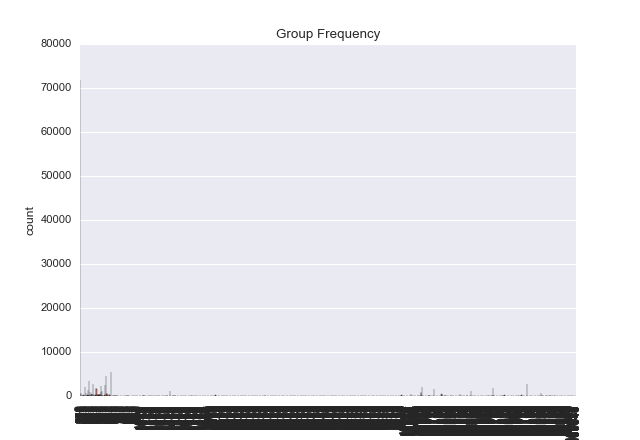

In [163]:
# Start with Column 63. Ingroup. No details in codebook!! It's a code for the gname. There seems to be a pattern in it.
# 58 --> Name of group. Must find the pattern in the coding.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[63]
sec = columns[58]

curr_column = dfs[curr]
sec_column = dfs[sec]

print(curr)
print(sec)

unique_ingroup, ingroup_counts = np.unique(curr_column, return_counts=True)

#print(unique_ingroup)
#print(ingroup_counts) 

ingroup_dict = {}

nan_count = 0
for index, ingroupnum in enumerate(curr_column):
    if str(ingroupnum) == "nan":
        nan_count += 1
    else:
        if ingroupnum in ingroup_dict:
            if sec_column[index] not in ingroup_dict[ingroupnum]:
                print("Group num " + str(ingroupnum) + " has more than 1")
                ingroup_dict[ingroupnum].append(sec_column[index])
        else:
            ingroup_dict[ingroupnum] = [sec_column[index]]

#for key in sorted(ingroup_dict,reverse=True):
#    print("%s: %s" % (key, ingroup_dict[key]))
print("Number of missing data in code: " + str(nan_count))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(ingroup_counts)))
total = np.sum(ingroup_counts)
if total_entries == total:
    print("Sum of ingroup frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Group Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)
#Plot loos like shit. Need to find a way to plot only sections of the histogram

In [145]:
# Start with Column 64. Ingroup2. No details in codebook!! It's a code for the gname. There seems to be a pattern in it.
# 58 --> Name of group. Does ingroup2 mean the group responsible for the gname2?
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[64]

curr_column = dfs[curr]

print(curr)

unique_ingroup, ingroup_counts = np.unique(curr_column, return_counts=True)

#print(unique_ingroup)
#print(ingroup_counts) 

nan_count = 0
for index, ingroupnum in enumerate(curr_column):
    if str(ingroupnum) == "nan":
        nan_count += 1

#for key in sorted(ingroup_dict,reverse=True):
#    print("%s: %s" % (key, ingroup_dict[key]))
print("Number of missing data in code: " + str(nan_count))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(ingroup_counts)))
total = np.sum(ingroup_counts)
if total_entries == total:
    print("Sum of ingroup frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

#ax = sns.countplot(curr_column)
#mp.pyplot.title("Target Type 3 Frequency")
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


ingroup2
Number of missing data in code: 155553
Length matches.
Sum of ingroup frequencies = Number of total entries


In [147]:
# Start with Column 65. Ingroup3. No details in codebook!! It's a code for the gname3. There seems to be a pattern in it.
# 58 --> Name of group. Does ingroup3 mean the group responsible for the gname3?
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[65]

curr_column = dfs[curr]

print(curr)

unique_ingroup, ingroup_counts = np.unique(curr_column, return_counts=True)

#print(unique_ingroup)
#print(ingroup_counts) 

nan_count = 0
for index, ingroupnum in enumerate(curr_column):
    if str(ingroupnum) == "nan":
        nan_count += 1

#for key in sorted(ingroup_dict,reverse=True):
#    print("%s: %s" % (key, ingroup_dict[key]))
print("Number of missing data in code: " + str(nan_count))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(ingroup_counts)))
total = np.sum(ingroup_counts)
if total_entries == total:
    print("Sum of ingroup frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

#ax = sns.countplot(curr_column)
#mp.pyplot.title("Target Type 3 Frequency")
#_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


ingroup3
Number of missing data in code: 156608
Length matches.
Sum of ingroup frequencies = Number of total entries


guncertain1
{0.0: 142404, 1.0: 13990}
Length matches.
Achtung!! Cumulative frequency mismatch.
Number of missing data: 378


<IPython.core.display.Javascript object>


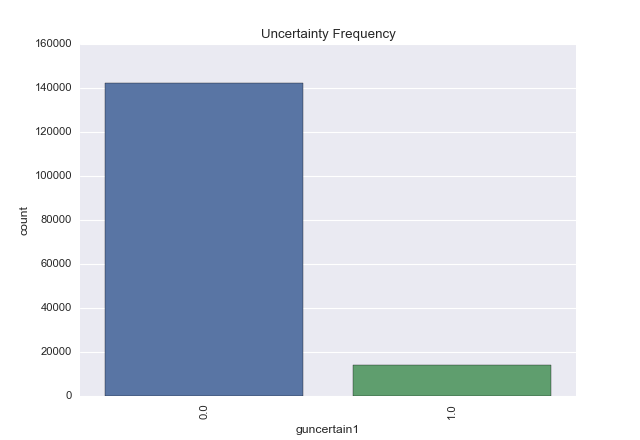

In [153]:
# Start with Column 68. Is the responsibility of the group uncertain? 1 - uncertain, 0 certain
# Histogram shows number of certain/uncertain events

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[68]
curr_column = dfs[curr]
print(curr)
guncertain_dict = {}

nan_count = 0
for index, guncertain in enumerate(curr_column):
    if str(guncertain) == "nan":
        nan_count += 1
    else:
        if guncertain in guncertain_dict:
            guncertain_dict[guncertain] += 1
        else:
            guncertain_dict[guncertain] = 1

print(guncertain_dict)
#Check if any row is missing
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. ")
total = np.sum(guncertain_dict.values())
if total_entries == total:
    print("Sum of Guncertain frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing data: " + str(nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Uncertainty Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


In [157]:
# Start with Column 69 and 70. Is the responsibility of the group2 and group3 uncertain? 1 - uncertain, 0 certain

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[69]
sec = columns[70]
curr_column = dfs[curr]
sec_column = dfs[sec]

print(curr)
print(sec)

unique_uncertainty2, uncertainty2_counts = np.unique(curr_column, return_counts=True)
unique_uncertainty3, uncertainty3_counts = np.unique(sec_column, return_counts=True)
print("Uncertainty2")
print(unique_uncertainty2)
print(uncertainty2_counts)
print("Uncertainty3")
print(unique_uncertainty3)
print(uncertainty3_counts)

#nan_count = 0
#for index, guncertain in enumerate(curr_column):
#    if str(guncertain) == "nan":
#        nan_count += 1
    #else:
    #    if guncertain in guncertain_dict:
    #        guncertain_dict[guncertain] += 1
    #    else:
    #        guncertain_dict[guncertain] = 1

#print(guncertain_dict)
#Check if any row is missing
if total_entries == len(curr_column) and total_entries == len(sec_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. ")

total = np.sum(uncertainty2_counts)
if total_entries == total:
    print("Sum of Guncertain2 frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative 2 frequency mismatch.")

total = np.sum(uncertainty3_counts)
if total_entries == total:
    print("Sum of Guncertain3 frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative 3 frequency mismatch.")

guncertain2
Uncertainty2
[  0.   1.  nan ...,  nan  nan  nan]
[829 333   1 ...,   1   1   1]
Uncertainty3
[  0.   1.  nan ...,  nan  nan  nan]
[118  42   1 ...,   1   1   1]
Length matches.
Sum of Guncertain2 frequencies = Number of total entries
Sum of Guncertain3 frequencies = Number of total entries


nperps
[-99.  -9.   0. ...,  nan  nan  nan]
[61891     2   139 ...,     1     1     1]
Number of missing data in code: 71132
Length matches.
Sum of ingroup frequencies = Number of total entries


<IPython.core.display.Javascript object>


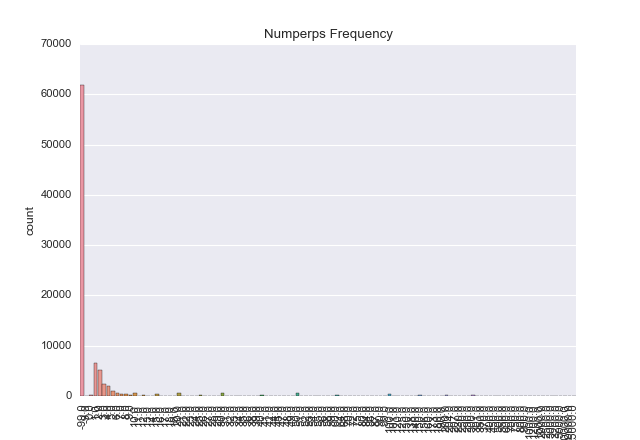

In [164]:
# Start with Column 71. nperps - minimum number of confirmed terrorists. -99 or Unknown for missing data.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[71]

curr_column = dfs[curr]

print(curr)

unique_numperps, numperps_counts = np.unique(curr_column, return_counts=True)

print(unique_numperps)
print(numperps_counts) 

nan_count = 0

for index, ingroupnum in enumerate(curr_column):
    if str(ingroupnum) == "nan":
        nan_count += 1

#for key in sorted(ingroup_dict,reverse=True):
#    print("%s: %s" % (key, ingroup_dict[key]))
print("Number of missing data in code: " + str(nan_count))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(numperps_counts)))
total = np.sum(numperps_counts)
if total_entries == total:
    print("Sum of ingroup frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Numperps Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


nperpcap
[-99.  -9.   0. ...,  nan  nan  nan]
[ 1503     4 82655 ...,     1     1     1]
Number of missing data in code: 69510
Length matches.
Sum of ingroup frequencies = Number of total entries


<IPython.core.display.Javascript object>


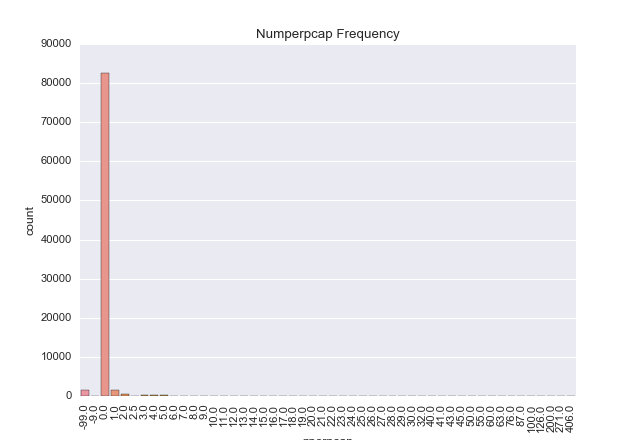

In [165]:
# Start with Column 72. nperpcap - minimum number of confirmed captured terrorists. -99 or Unknown for missing data.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[72]

curr_column = dfs[curr]

print(curr)

unique_numperps, numperps_counts = np.unique(curr_column, return_counts=True)

print(unique_numperps)
print(numperps_counts) 

nan_count = 0

for index, ingroupnum in enumerate(curr_column):
    if str(ingroupnum) == "nan":
        nan_count += 1

#for key in sorted(ingroup_dict,reverse=True):
#    print("%s: %s" % (key, ingroup_dict[key]))
print("Number of missing data in code: " + str(nan_count))

#Check if any row is missing the region name
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. total_entries = " + str(total_entries) + " length spec count = " + str(len(numperps_counts)))
total = np.sum(numperps_counts)
if total_entries == total:
    print("Sum of ingroup frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Numperpcap Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


claimed
[ -9.   0.   1. ...,  nan  nan  nan]
[ 1476 75966 13188 ...,     1     1     1]
Length matches.
Sum of claim frequencies = Number of total entries
Number of missing data: 66141


<IPython.core.display.Javascript object>


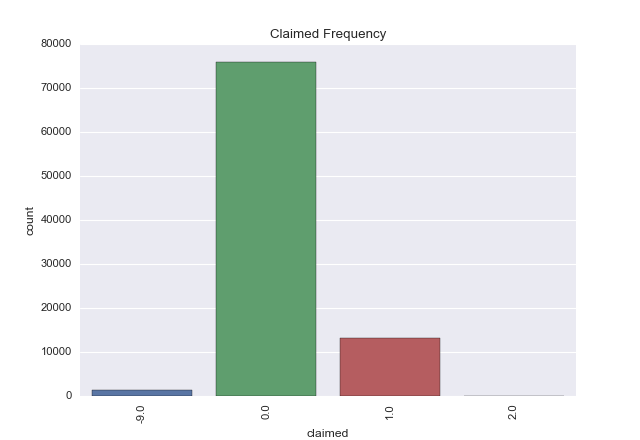

In [166]:
# Start with Column 73. Is the responsibility of the event been claimed. 1 - Yes 0 - No
# Histogram shows number of claimed/unclaimed events

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[73]
curr_column = dfs[curr]
print(curr)

unique_isclaimed, claimed_counts = np.unique(curr_column, return_counts=True)

print(unique_isclaimed)
print(claimed_counts) 

nan_count = 0
for index, guncertain in enumerate(curr_column):
    if str(guncertain) == "nan":
        nan_count += 1

#Check if any row is missing
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. ")
total = np.sum(claimed_counts)
if total_entries == total:
    print("Sum of claim frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing data: " + str(nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Claimed Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


claimmode
claimmode_txt
[  0.   1.   2. ...,  nan  nan  nan]
[   2  328 1588 ...,    1    1    1]
['.' '0' 'Call (post-incident)' 'Call (pre-incident)' 'E-mail' 'Letter'
 'Note left at scene' 'Other' 'Personal claim'
 'Posted to website, blog, etc.' 'Unknown' 'Video']
[143496      2   1588    167    488    328    769    446   3011   2868
   3389    220]
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


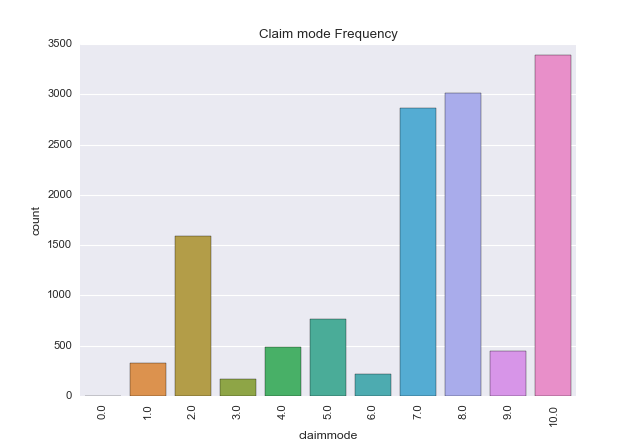

In [173]:
# Start with Column 74 and 75. claimmode and claimmode_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[74]
sec = columns[75]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_claimmodes, claimmode_counts = np.unique(curr_column, return_counts=True)
unique_claimmodes_txt, claimmode_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_claimmodes)
print(claimmode_counts)
print(unique_claimmodes_txt)
print(claimmode_counts_txt)

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("claimmode text present but claimmode code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Claimmode code present but Claimmode text is .. Index = " + str(index))
    
#Check if any row is missing the region name
total = np.sum(claimmode_counts_txt)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Claim mode Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

claim2
[ -9.   0.   1. ...,  nan  nan  nan]
[ 16 678 401 ...,   1   1   1]
Length matches.
Sum of claim frequencies = Number of total entries
Number of missing data: 155677


<IPython.core.display.Javascript object>


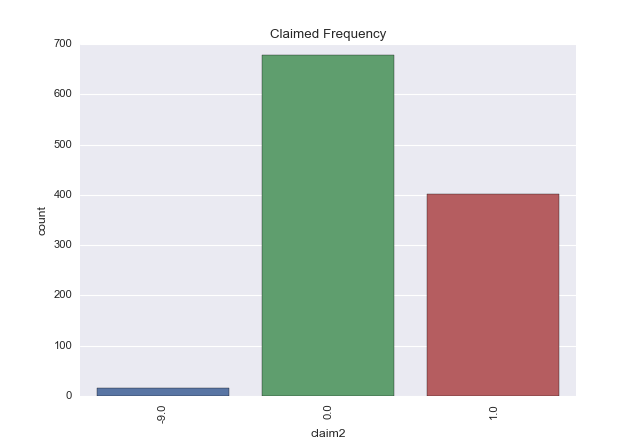

In [168]:
# Start with Column 76. Is the responsibility of the event been claimed by a second group. 1 - Yes 0 - No
# Histogram shows number of claimed/unclaimed events

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[76]
curr_column = dfs[curr]
print(curr)

unique_isclaimed, claimed_counts = np.unique(curr_column, return_counts=True)

print(unique_isclaimed)
print(claimed_counts) 

nan_count = 0
for index, guncertain in enumerate(curr_column):
    if str(guncertain) == "nan":
        nan_count += 1

#Check if any row is missing
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. ")
total = np.sum(claimed_counts)
if total_entries == total:
    print("Sum of claim frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing data: " + str(nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Claimed Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


claimmode2
claimmode2_txt
[  1.   2.   4. ...,  nan  nan  nan]
[17 53 11 ...,  1  1  1]
['.' 'Call (post-incident)' 'E-mail' 'Letter' 'Note left at scene' 'Other'
 'Personal claim' 'Posted to website, blog, etc.' 'Unknown' 'Video']
[156367     53     11     17      4     16     37     91    168      8]
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


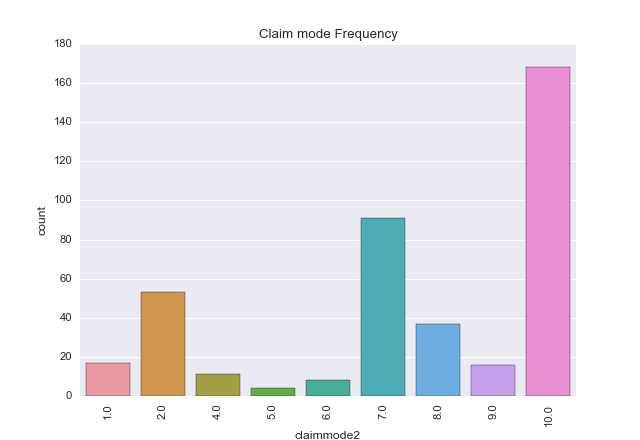

In [174]:
# Start with Column 77 and 78. claimmode2 and claimmode2_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[77]
sec = columns[78]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_claimmodes, claimmode_counts = np.unique(curr_column, return_counts=True)
unique_claimmodes_txt, claimmode_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_claimmodes)
print(claimmode_counts)
print(unique_claimmodes_txt)
print(claimmode_counts_txt)

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("claimmode text present but claimmode code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Claimmode code present but Claimmode text is .. Index = " + str(index))
    
#Check if any row is missing the region name
total = np.sum(claimmode_counts_txt)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Claim mode Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

claim3
[  0.   1.  nan ...,  nan  nan  nan]
[84 74  1 ...,  1  1  1]
Length matches.
Sum of claim frequencies = Number of total entries
Number of missing data: 156614


<IPython.core.display.Javascript object>


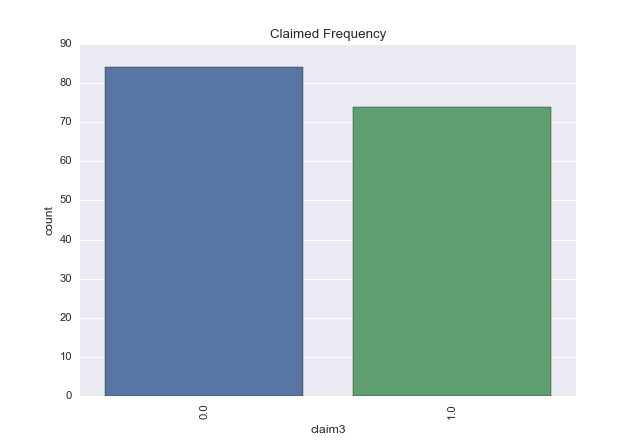

In [175]:
# Start with Column 79. Is the responsibility of the event been claimed by a third group. 1 - Yes 0 - No
# Histogram shows number of claimed/unclaimed events

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[79]
curr_column = dfs[curr]
print(curr)

unique_isclaimed, claimed_counts = np.unique(curr_column, return_counts=True)

print(unique_isclaimed)
print(claimed_counts) 

nan_count = 0
for index, guncertain in enumerate(curr_column):
    if str(guncertain) == "nan":
        nan_count += 1

#Check if any row is missing
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. ")
total = np.sum(claimed_counts)
if total_entries == total:
    print("Sum of claim frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing data: " + str(nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Claimed Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)


claimmode3
claimmode3_txt
[  1.   2.   4. ...,  nan  nan  nan]
[ 3 11  1 ...,  1  1  1]
['.' 'Call (post-incident)' 'E-mail' 'Letter' 'Other' 'Personal claim'
 'Posted to website, blog, etc.' 'Unknown' 'Video']
[156696     11      1      3      9      5     14     32      1]
Sum of Vicinity frequencies = Number of total entries


<IPython.core.display.Javascript object>


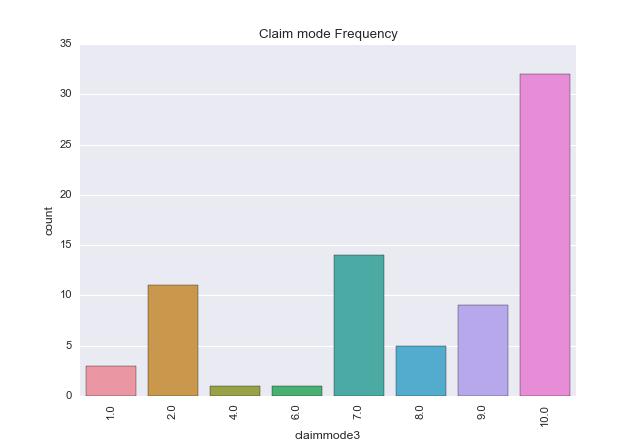

In [189]:
# Start with Column 80 and 81. claimmode3 and claimmode3_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[80]
sec = columns[81]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_claimmodes, claimmode_counts = np.unique(curr_column, return_counts=True)
unique_claimmodes_txt, claimmode_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_claimmodes)
print(claimmode_counts)
print(unique_claimmodes_txt)
print(claimmode_counts_txt)

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("claimmode text present but claimmode code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Claimmode code present but Claimmode text is .. Index = " + str(index))
    
#Check if any row is missing the region name
total = np.sum(claimmode_counts_txt)
if total_entries == total:
    print("Sum of Vicinity frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Claim mode Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

compclaim
[ -9.   0.   1. ...,  nan  nan  nan]
[3435  914  260 ...,    1    1    1]
Length matches.
Sum of comp claim frequencies = Number of total entries
Number of missing data: 152163


<IPython.core.display.Javascript object>


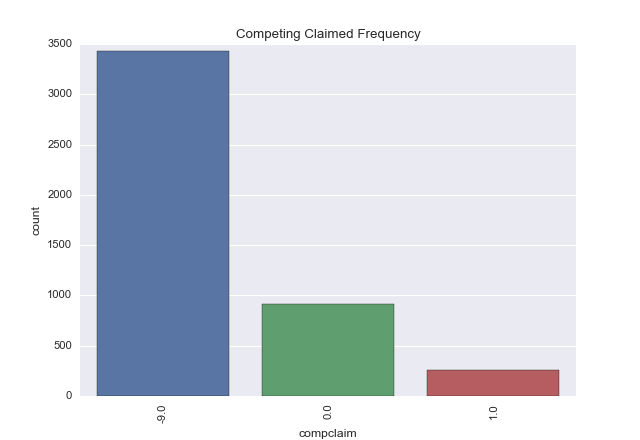

In [177]:
# Start with Column 82. Is there competing claims of responsibility. 1 - Yes 0 - No
# Histogram shows number of claimed/unclaimed events

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[82]
curr_column = dfs[curr]
print(curr)

unique_iscomp, comp_counts = np.unique(curr_column, return_counts=True)

print(unique_iscomp)
print(comp_counts) 

nan_count = 0
for index, compclaim in enumerate(curr_column):
    if str(compclaim) == "nan":
        nan_count += 1

#Check if any row is missing
if total_entries == len(curr_column):
    print("Length matches.")
else:
    print("Achtung!! Length mismatch. ")
total = np.sum(comp_counts)
if total_entries == total:
    print("Sum of comp claim frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

print("Number of missing data: " + str(nan_count))
ax = sns.countplot(curr_column)
mp.pyplot.title("Competing Claimed Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

weaptype1
weaptype1_txt
[ 1  2  3  5  6  7  8  9 10 11 12 13]
[   35   231    13 51802 79126    33  9812  3013   104   123    92 12388]
['Biological' 'Chemical' 'Explosives/Bombs/Dynamite' 'Fake Weapons'
 'Firearms' 'Incendiary' 'Melee' 'Other' 'Radiological'
 'Sabotage Equipment' 'Unknown'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']
[   35   231 79126    33 51802  9812  3013    92    13   123 12388   104]
Number of missing data: 0
Sum of weapon frequencies = Number of total entries


<IPython.core.display.Javascript object>


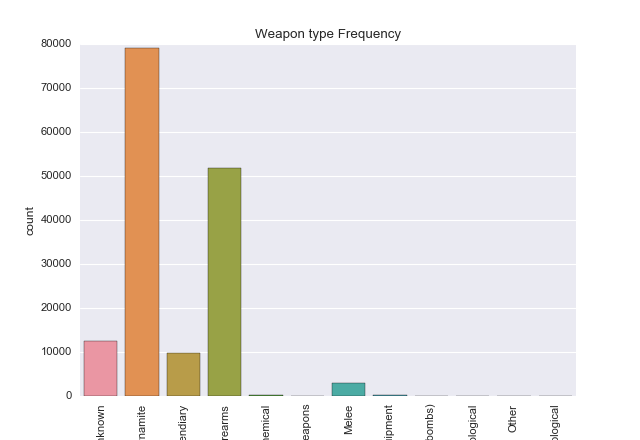

In [197]:
# Start with Column 83 and 84. weapon and weapon_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[83]
sec = columns[84]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_weapons, weapon_counts = np.unique(curr_column, return_counts=True)
unique_weapons_txt, weapon_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_weapons)
print(weapon_counts)
print(unique_weapons_txt)
print(weapons_counts_txt)


nan_count = 0
for weapon in curr_column:
    if str(weapon) == "nan":
        nan_count += 1
print("Number of missing data: " + str(nan_count))


if total_entries!=len(curr_column) or total_entries!=len(sec_column):
    print("Length mismatch")
#Check if any row is missing the region name
total = np.sum(weapon_counts_txt)
if total_entries == total:
    print("Sum of weapon frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(sec_column)
mp.pyplot.title("Weapon type Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

weapsubtype1
weapsubtype1_txt
[  1.   2.   3. ...,  nan  nan  nan]
[   70 16862  6262 ...,     1     1     1]
['.' 'Arson/Fire' 'Automatic Weapon' 'Blunt Object' 'Dynamite/TNT'
 'Gasoline or Alcohol' 'Grenade' 'Handgun' 'Hands, Feet, Fists'
 'Knife or Other Sharp Object' 'Land Mine' 'Letter Bomb'
 'Molotov Cocktail/Petrol Bomb' 'Other Explosive Type' 'Other Gun Type'
 'Poisoning' 'Pressure Trigger' 'Projectile (rockets, mortars, RPGs, etc.)'
 'Remote Trigger' 'Rifle/Shotgun (non-automatic)'
 'Rope or Other Strangling Device' 'Sticky Bomb' 'Suffocation'
 'Suicide (carried bodily by human being)' 'Time Fuse'
 'Unknown Explosive Type' 'Unknown Gun Type' 'Unknown Weapon Type'
 'Vehicle']
[17907  3139 16862   530  1158   798  4445  6262   200  2098  3258   539
   956  6647    78    70   176  8024  2181   927    91  1290     9  2249
   807 40066 27662    68  8275]
Sum of weaponsub frequencies = Number of total entries


<IPython.core.display.Javascript object>


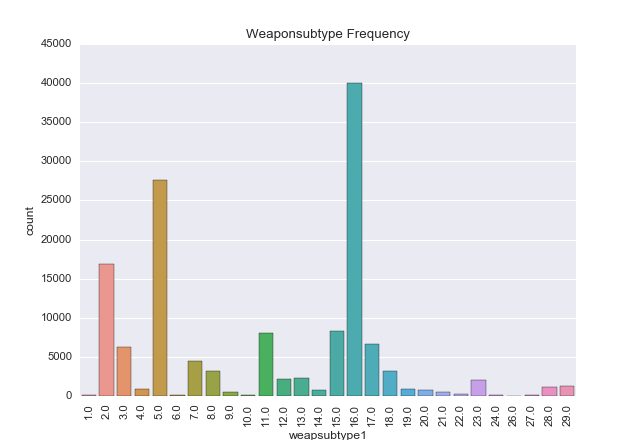

In [181]:
# Start with Column 85 and 86. weaponsubtype and weaponsubtype_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[85]
sec = columns[86]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_weaponsub, weaponsub_counts = np.unique(curr_column, return_counts=True)
unique_weaponsub_txt, weaponsub_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_weaponsub)
print(weaponsub_counts)
print(unique_weaponsub_txt)
print(weaponsub_counts_txt)

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Weapon sub text present but Weapon code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Weapon code present but Weapon text is .. Index = " + str(index))
    
#Check if any row is missing the region name
total = np.sum(weaponsub_counts_txt)
if total_entries == total:
    print("Sum of weaponsub frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Weaponsubtype Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

weaptype2
weaptype2_txt
[  1.   2.   5. ...,  nan  nan  nan]
[   1   82 4177 ...,    1    1    1]
['.' 'Biological' 'Chemical' 'Explosives/Bombs/Dynamite' 'Fake Weapons'
 'Firearms' 'Incendiary' 'Melee' 'Other' 'Sabotage Equipment' 'Unknown'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']
[   35   231 79126    33 51802  9812  3013    92    13   123 12388   104]
Sum of weapon frequencies = Number of total entries


<IPython.core.display.Javascript object>


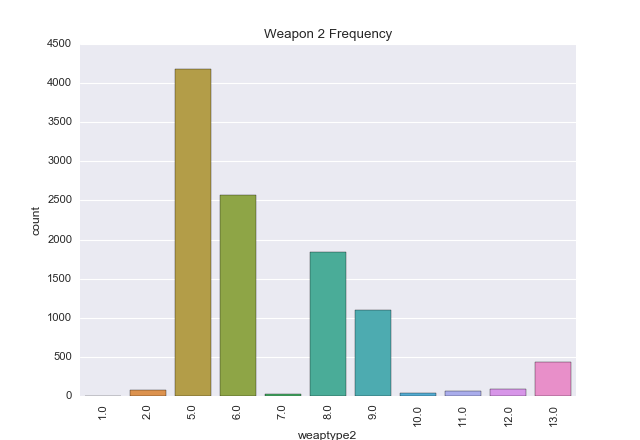

In [187]:
# Start with Column 87 and 88. weapon2 and weapon2_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[87]
sec = columns[88]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_weapons, weapon_counts = np.unique(curr_column, return_counts=True)
unique_weapons_txt, weapon_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_weapons)
print(weapon_counts)
print(unique_weapons_txt)
print(weapons_counts_txt)

if total_entries!=len(curr_column) or total_entries!=len(sec_column):
    print("Length mismatch")
#Check if any row is missing the region name
total = np.sum(weapon_counts_txt)
if total_entries == total:
    print("Sum of weapon frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Weapon 2 Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

weapsubtype2
weapsubtype2_txt
[  1.   2.   3. ...,  nan  nan  nan]
[  15 1475  379 ...,    1    1    1]
['.' 'Arson/Fire' 'Automatic Weapon' 'Blunt Object' 'Dynamite/TNT'
 'Gasoline or Alcohol' 'Grenade' 'Handgun' 'Hands, Feet, Fists'
 'Knife or Other Sharp Object' 'Land Mine' 'Letter Bomb'
 'Molotov Cocktail/Petrol Bomb' 'Other Explosive Type' 'Other Gun Type'
 'Poisoning' 'Pressure Trigger' 'Projectile (rockets, mortars, RPGs, etc.)'
 'Remote Trigger' 'Rifle/Shotgun (non-automatic)'
 'Rope or Other Strangling Device' 'Suffocation'
 'Suicide (carried bodily by human being)' 'Time Fuse'
 'Unknown Explosive Type' 'Unknown Gun Type' 'Unknown Weapon Type']
[147477   1115   1475    166     63    148    603    379     95    686
    106     17    153     59     23     15      3    616     18    273
     57      3    115     34    928   2062     83]
Sum of weaponsub frequencies = Number of total entries


<IPython.core.display.Javascript object>


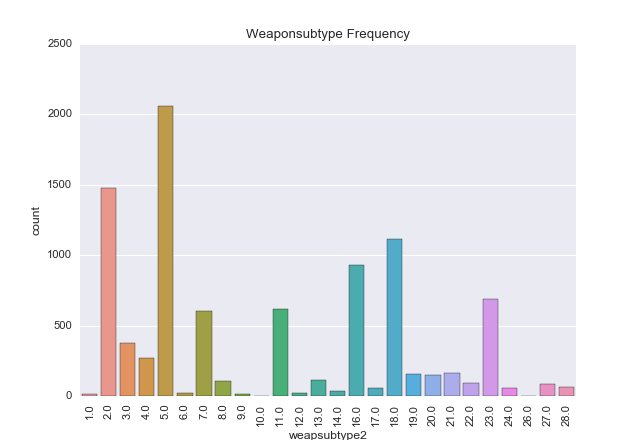

In [184]:
# Start with Column 89 and 90. weaponsubtype 2 and weaponsubtype2_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[89]
sec = columns[90]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_weaponsub, weaponsub_counts = np.unique(curr_column, return_counts=True)
unique_weaponsub_txt, weaponsub_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_weaponsub)
print(weaponsub_counts)
print(unique_weaponsub_txt)
print(weaponsub_counts_txt)

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Weapon sub text present but Weapon code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Weapon code present but Weapon text is .. Index = " + str(index))
    
#Check if any row is missing the region name
total = np.sum(weaponsub_counts_txt)
if total_entries == total:
    print("Sum of weaponsub frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Weaponsubtype2 Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

weaptype3
weaptype3_txt
[  2.   5.   6. ...,  nan  nan  nan]
[  8 616 199 ...,   1   1   1]
['.' 'Chemical' 'Explosives/Bombs/Dynamite' 'Fake Weapons' 'Firearms'
 'Incendiary' 'Melee' 'Other' 'Sabotage Equipment' 'Unknown'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']
[   35   231 79126    33 51802  9812  3013    92    13   123 12388   104]
Sum of weapon frequencies = Number of total entries


<IPython.core.display.Javascript object>


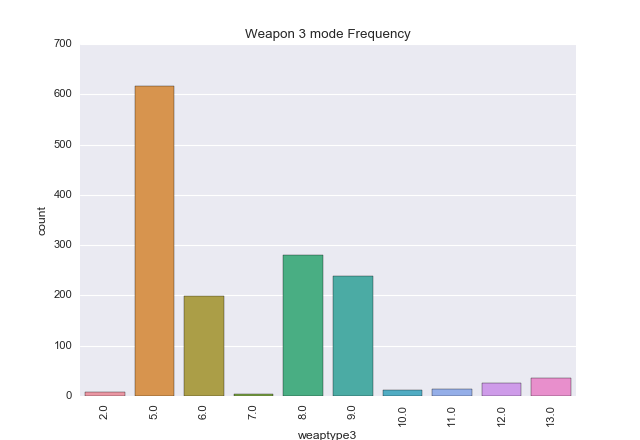

In [186]:
# Start with Column 91 and 92. weapon3 and weapon3_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[91]
sec = columns[92]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_weapons, weapon_counts = np.unique(curr_column, return_counts=True)
unique_weapons_txt, weapon_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_weapons)
print(weapon_counts)
print(unique_weapons_txt)
print(weapons_counts_txt)

if total_entries!=len(curr_column) or total_entries!=len(sec_column):
    print("Length mismatch")
#Check if any row is missing the region name
total = np.sum(weapon_counts_txt)
if total_entries == total:
    print("Sum of weapon frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Weapon 3 mode Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

weapsubtype3
weapsubtype3_txt
[  1.   2.   3. ...,  nan  nan  nan]
[  1 217  85 ...,   1   1   1]
['.' 'Arson/Fire' 'Automatic Weapon' 'Blunt Object' 'Dynamite/TNT'
 'Gasoline or Alcohol' 'Grenade' 'Handgun' 'Hands, Feet, Fists'
 'Knife or Other Sharp Object' 'Land Mine' 'Molotov Cocktail/Petrol Bomb'
 'Other Explosive Type' 'Other Gun Type' 'Poisoning'
 'Projectile (rockets, mortars, RPGs, etc.)' 'Remote Trigger'
 'Rifle/Shotgun (non-automatic)' 'Rope or Other Strangling Device'
 'Suffocation' 'Unknown Explosive Type' 'Unknown Gun Type'
 'Unknown Weapon Type']
[155466    132    217     39      8     59     56     85     10    166
      8     62     11      9      1     63      1     54     14      4
     69    235      3]
Sum of weaponsub frequencies = Number of total entries


<IPython.core.display.Javascript object>


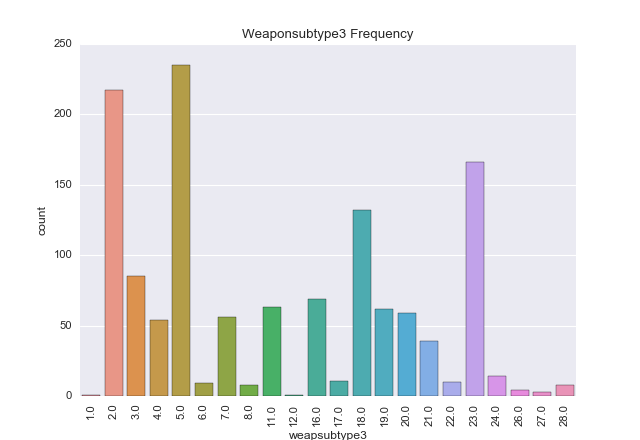

In [191]:
# Start with Column 93 and 94. weaponsubtype3 and weaponsubtype3_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[93]
sec = columns[94]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_weaponsub, weaponsub_counts = np.unique(curr_column, return_counts=True)
unique_weaponsub_txt, weaponsub_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_weaponsub)
print(weaponsub_counts)
print(unique_weaponsub_txt)
print(weaponsub_counts_txt)

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Weapon sub text present but Weapon code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Weapon code present but Weapon text is .. Index = " + str(index))
    
#Check if any row is missing the region name
total = np.sum(weaponsub_counts_txt)
if total_entries == total:
    print("Sum of weaponsub frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Weaponsubtype3 Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

weaptype4
weaptype4_txt
[  5.   6.   8. ...,  nan  nan  nan]
[29 27 10 ...,  1  1  1]
['.' 'Explosives/Bombs/Dynamite' 'Firearms' 'Incendiary' 'Melee' 'Other']
[   35   231 79126    33 51802  9812  3013    92    13   123 12388   104]
Sum of weapon frequencies = Number of total entries


<IPython.core.display.Javascript object>


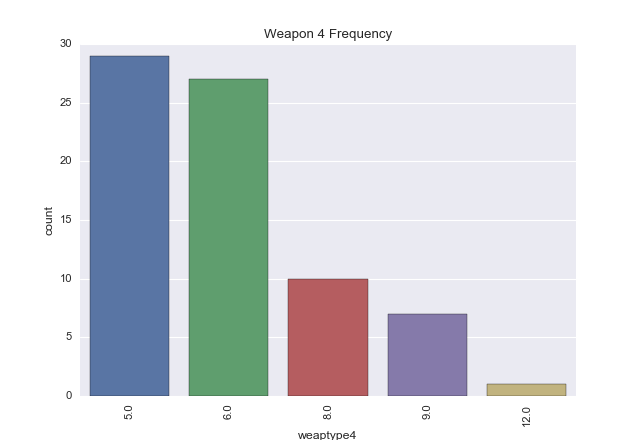

In [192]:
# Start with Column 95 and 96. weapon4 and weapon4_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[95]
sec = columns[96]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_weapons, weapon_counts = np.unique(curr_column, return_counts=True)
unique_weapons_txt, weapon_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_weapons)
print(weapon_counts)
print(unique_weapons_txt)
print(weapons_counts_txt)

if total_entries!=len(curr_column) or total_entries!=len(sec_column):
    print("Length mismatch")
#Check if any row is missing the region name
total = np.sum(weapon_counts_txt)
if total_entries == total:
    print("Sum of weapon frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Weapon 4 Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

weapsubtype4
weapsubtype4_txt
[  2.   3.   4. ...,  nan  nan  nan]
[16  3  4 ...,  1  1  1]
['.' 'Arson/Fire' 'Automatic Weapon' 'Blunt Object' 'Dynamite/TNT'
 'Gasoline or Alcohol' 'Grenade' 'Handgun' 'Knife or Other Sharp Object'
 'Land Mine' 'Other Explosive Type'
 'Projectile (rockets, mortars, RPGs, etc.)'
 'Rifle/Shotgun (non-automatic)' 'Time Fuse' 'Unknown Explosive Type'
 'Unknown Gun Type' 'Unknown Weapon Type']
[156701      2     16      4      1      1      6      3      3      1
      1      7      4      1     11      6      4]
Sum of weaponsub frequencies = Number of total entries


<IPython.core.display.Javascript object>


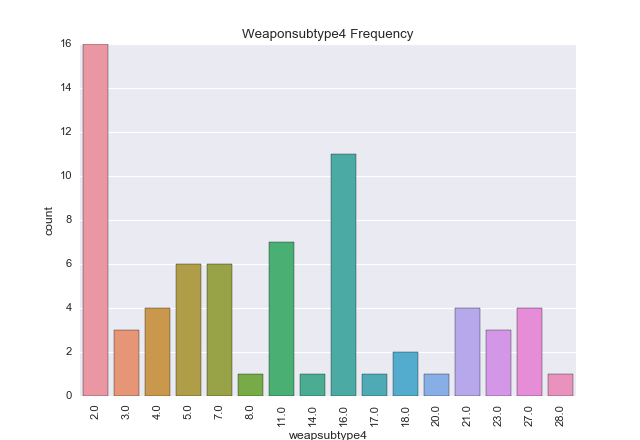

In [193]:
# Start with Column 97 and 98. weaponsubtype4 and weaponsubtype4_txt
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[97]
sec = columns[98]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_weaponsub, weaponsub_counts = np.unique(curr_column, return_counts=True)
unique_weaponsub_txt, weaponsub_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_weaponsub)
print(weaponsub_counts)
print(unique_weaponsub_txt)
print(weaponsub_counts_txt)

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Weapon sub text present but Weapon code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Weapon code present but Weapon text is .. Index = " + str(index))
    
#Check if any row is missing the region name
total = np.sum(weaponsub_counts_txt)
if total_entries == total:
    print("Sum of weaponsub frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Weaponsubtype4 Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

nkill
[ 0.    0.07  0.08 ...,   nan   nan   nan]
[76916    12     2 ...,     1     1     1]
Number of missing data: 8945
Sum of nkill frequencies = Number of total entries


<IPython.core.display.Javascript object>


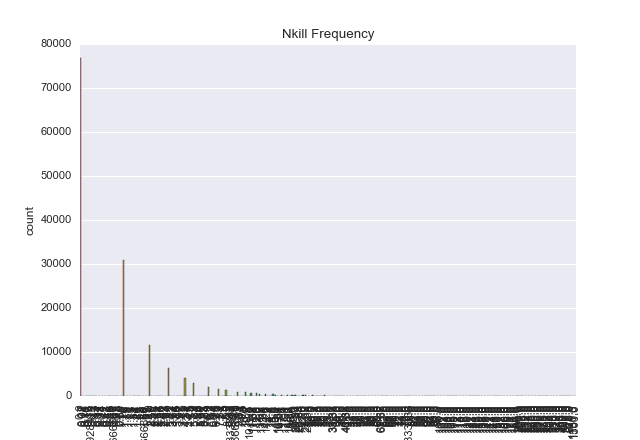

In [198]:
# Start with Column 100. nkills. Perps + victims. Average used if data only available for totals of linked events. 
# The kill counts should be cleaned ~ nearest whole number.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[100]
print(curr)
curr_column = dfs[curr]

unique_nkills, nkill_counts = np.unique(curr_column, return_counts=True)

print(unique_nkills)
print(nkill_counts)

nan_count = 0
for nkill in curr_column:
    if str(nkill) == "nan":
        nan_count += 1
print("Number of missing data: " + str(nan_count))


#Check if any row is missing the region name
total = np.sum(nkill_counts)
if total_entries == total:
    print("Sum of nkill frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Nkill Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

nkillus
[  0.   1.   2. ...,  nan  nan  nan]
[91487   545   150 ...,     1     1     1]
Number of missing data: 64457
Sum of nkill us frequencies = Number of total entries


<IPython.core.display.Javascript object>


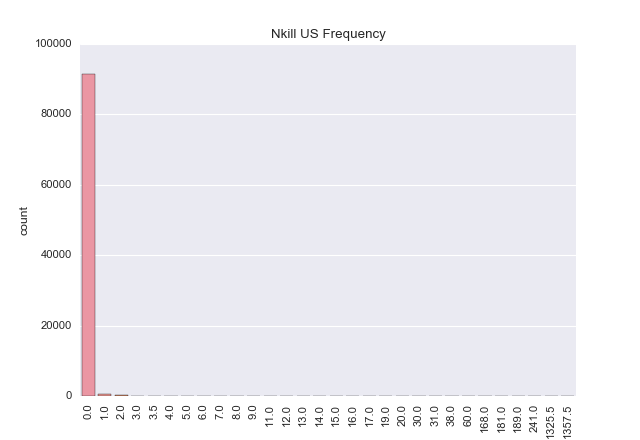

In [199]:
# Start with Column 101. nkillus. Perps + victims from us. Average used if data only available for totals of linked events. 
# The kill counts should be cleaned ~ nearest whole number.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[101]
print(curr)
curr_column = dfs[curr]

unique_nkills, nkill_counts = np.unique(curr_column, return_counts=True)

print(unique_nkills)
print(nkill_counts)

nan_count = 0
for nkillus in curr_column:
    if str(nkillus) == "nan":
        nan_count += 1
print("Number of missing data: " + str(nan_count))
  
#Check if any row is missing the region name
total = np.sum(nkill_counts)
if total_entries == total:
    print("Sum of nkill us frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Nkill US Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

nkillter
[ 0.    0.33  0.34 ...,   nan   nan   nan]
[80927     4     2 ...,     1     1     1]
Number of missing data: 66388
Sum of nkill ter frequencies = Number of total entries


<IPython.core.display.Javascript object>


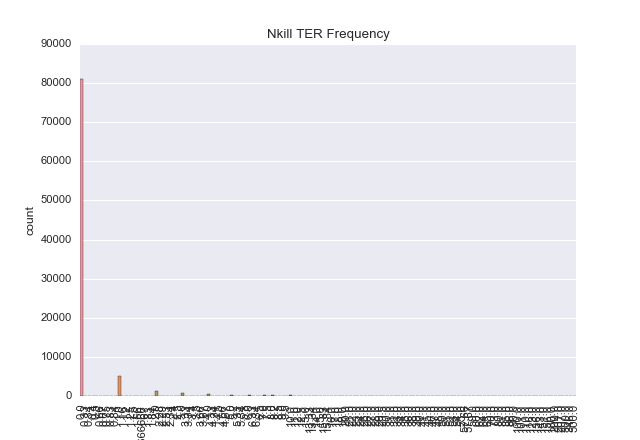

In [200]:
# Start with Column 102. nkillter. Perps killed. Average used if data only available for totals of linked events. 
# The kill counts should be cleaned ~ nearest whole number.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[102]
print(curr)
curr_column = dfs[curr]

unique_nkills, nkill_counts = np.unique(curr_column, return_counts=True)

print(unique_nkills)
print(nkill_counts)

nan_count = 0
for nkillter in curr_column:
    if str(nkillter) == "nan":
        nan_count += 1
print("Number of missing data: " + str(nan_count))
  
#Check if any row is missing the region name
total = np.sum(nkill_counts)
if total_entries == total:
    print("Sum of nkill ter frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Nkill TER Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

nwound
[ 0.    0.14  0.15 ...,   nan   nan   nan]
[90099     5     3 ...,     1     1     1]
Number of missing data: 14200
Sum of nwound frequencies = Number of total entries


<IPython.core.display.Javascript object>


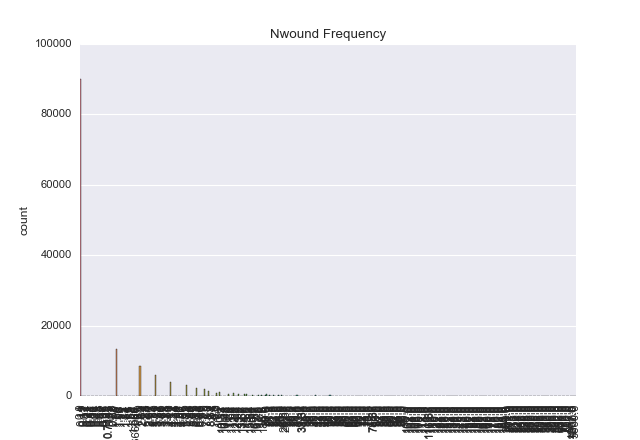

In [203]:
# Start with Column 103. nwound. Perps + victims from us. Average used if data only available for totals of linked events. 
# The kill counts should be cleaned ~ nearest whole number.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[103]
print(curr)
curr_column = dfs[curr]

unique_nwounds, nwound_counts = np.unique(curr_column, return_counts=True)

print(unique_nwounds)
print(nwound_counts)

nan_count = 0
for nwound in curr_column:
    if str(nwound) == "nan":
        nan_count += 1
print("Number of missing data: " + str(nan_count))
  
#Check if any row is missing the region name
total = np.sum(nwound_counts)
if total_entries == total:
    print("Sum of nwound frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Nwound Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

nwoundus
[ 0.     0.875  1.    ...,    nan    nan    nan]
[91502     8   264 ...,     1     1     1]
Number of missing data: 64706
Sum of nwound us frequencies = Number of total entries


<IPython.core.display.Javascript object>


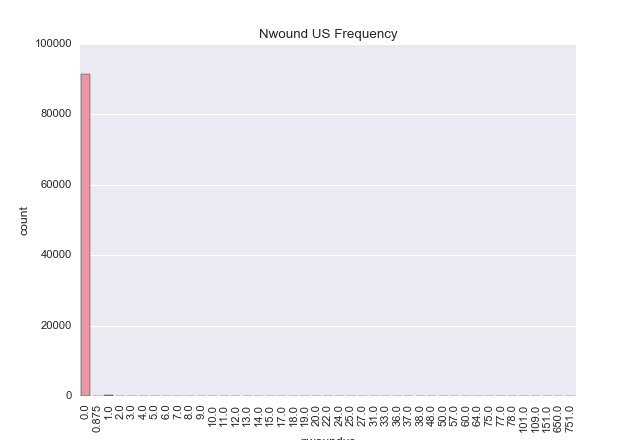

In [205]:
# Start with Column 104. nwoundus. Perps + victims from us. Average used if data only available for totals of linked events. 
# The wound counts should be cleaned ~ nearest whole number.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[104]
print(curr)
curr_column = dfs[curr]

unique_nwounds, nwound_counts = np.unique(curr_column, return_counts=True)

print(unique_nwounds)
print(nwound_counts)

nan_count = 0
for nwoundus in curr_column:
    if str(nwoundus) == "nan":
        nan_count += 1
print("Number of missing data: " + str(nan_count))
  
#Check if any row is missing the region name
total = np.sum(nwound_counts)
if total_entries == total:
    print("Sum of nwound us frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Nwound US Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

nwoundte
[ 0.    0.11  0.12 ...,   nan   nan   nan]
[86814     8     1 ...,     1     1     1]
Number of missing data: 68310
Sum of nwound us frequencies = Number of total entries


<IPython.core.display.Javascript object>


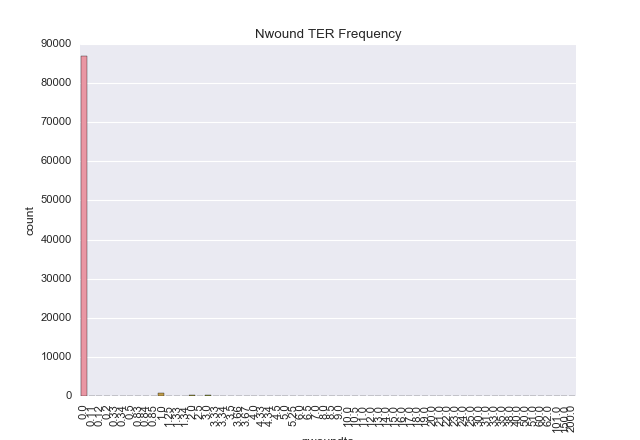

In [206]:
# Start with Column 105. nwoundter. Perps . Average used if data only available for totals of linked events. 
# The wound counts should be cleaned ~ nearest whole number.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[105]
print(curr)
curr_column = dfs[curr]

unique_nwounds, nwound_counts = np.unique(curr_column, return_counts=True)

print(unique_nwounds)
print(nwound_counts)

nan_count = 0
for nwoundus in curr_column:
    if str(nwoundus) == "nan":
        nan_count += 1
print("Number of missing data: " + str(nan_count))
  
#Check if any row is missing the region name
total = np.sum(nwound_counts)
if total_entries == total:
    print("Sum of nwound us frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Nwound TER Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

property
[-9  0  1]
[17097 53849 85826]
Number of missing data: 0
Sum of is damage frequencies = Number of total entries


<IPython.core.display.Javascript object>


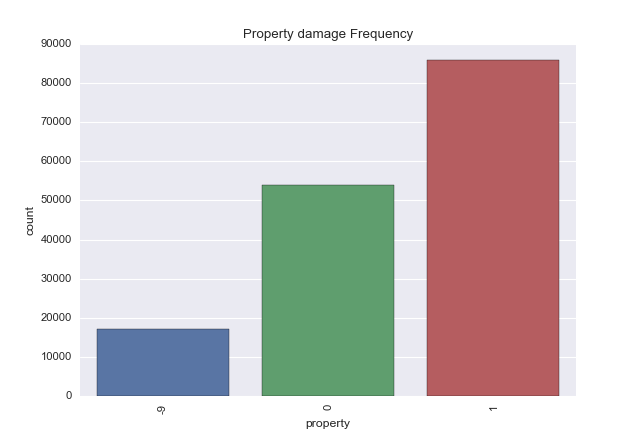

In [207]:
# Start with Column 106.  IS there property damage.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[106]
print(curr)
curr_column = dfs[curr]

unique_isdamage, isdamage_counts = np.unique(curr_column, return_counts=True)

print(unique_isdamage)
print(isdamage_counts)

nan_count = 0
for isdamage in curr_column:
    if str(isdamage) == "nan":
        nan_count += 1
print("Number of missing data: " + str(nan_count))
  
#Check if any row is missing the region name
total = np.sum(isdamage_counts)
if total_entries == total:
    print("Sum of is damage frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Property damage Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

propextent
propextent_txt
[  1.   2.   3. ...,  nan  nan  nan]
[    5   893 37522 ...,     1     1     1]
['.' 'Catastrophic (likely > $1 billion)'
 'Major (likely > $1 million but < $1 billion)'
 'Minor (likely < $1 million)' 'Unknown']
[100420      5    893  37522  17932]
Sum of damage frequencies = Number of total entries


<IPython.core.display.Javascript object>


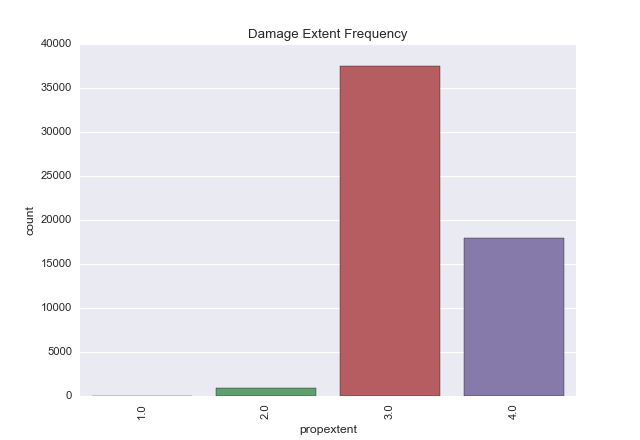

In [209]:
# Start with Column 107 and 108. Extent of damage code. Extent of damage text.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[107]
sec = columns[108]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_damage, damage_counts = np.unique(curr_column, return_counts=True)
unique_damage_txt, damage_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_damage)
print(damage_counts)
print(unique_damage_txt)
print(damage_counts_txt)

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Damage text present but Damage code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Damage code present but Damage text is .. Index = " + str(index))
    
#Check if any row is missing the region name
total = np.sum(damage_counts_txt)
if total_entries == total:
    print("Sum of damage frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Damage Extent Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [210]:
# Start with Column 109. Dollar value of property damaged. 

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[109]
curr_column = dfs[curr]
print(curr)

unique_damage, damage_counts = np.unique(curr_column, return_counts=True)
print(unique_damage)
print(damage_counts)

nan_count = 0
unknown_count = 0
for index in range(0,total_entries):
    if str(curr_column[index]) == "nan":
        nan_count += 1
    elif curr_column[index] == -99:
        unknown_count += 1

print("Missing values: " + str(nan_count))
print("Unknown values: " + str(unknown_count))

propvalue
[-99.   0.   1. ...,  nan  nan  nan]
[21019   194     2 ...,     1     1     1]
Missing values: 125460
Unknown values: 21019


ishostkid
[ -9.   0.   1.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan]
[   207 145119  11268      1      1      1      1      1      1      1


<IPython.core.display.Javascript object>


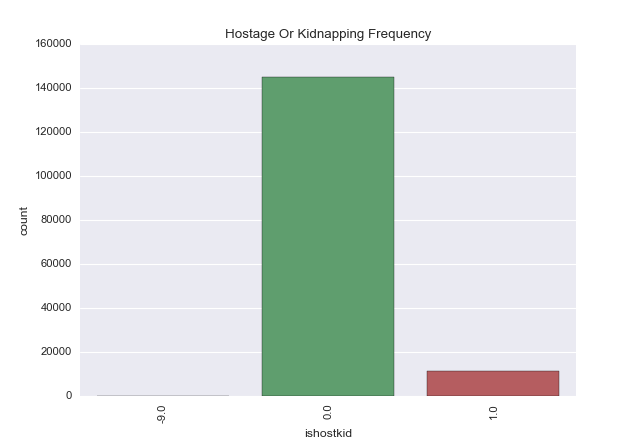

In [212]:
# Start with Column 111.  Is it a hostage/kidnapping event. Have to cross check all hostage events with eventtype.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[111]
print(curr)
curr_column = dfs[curr]

unique_ishostkid, ishostkid_counts = np.unique(curr_column, return_counts=True)

print(unique_ishostkid)
print(ishostkid_counts)

nan_count = 0
unknown_count = 0
for ishostkid in curr_column:
    if str(ishostkid) == "nan":
        nan_count += 1
    elif ishostkid == -9:
        unknown_count += 1
print("Number of missing data: " + str(nan_count))
print("Number of unknown data: " + str(unknown_count))
  
#Check if any row is missing the region name
total = np.sum(ishostkid_counts)
if total_entries == total:
    print("Sum of ishostkid frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Hostage Or Kidnapping Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

nhostkid
[-99.     0.     0.25 ...,    nan    nan    nan]
[1062    6   16 ...,    1    1    1]
Number of missing data: 145504
Number of unknown data: 1062
Sum of nhostkid frequencies = Number of total entries


<IPython.core.display.Javascript object>


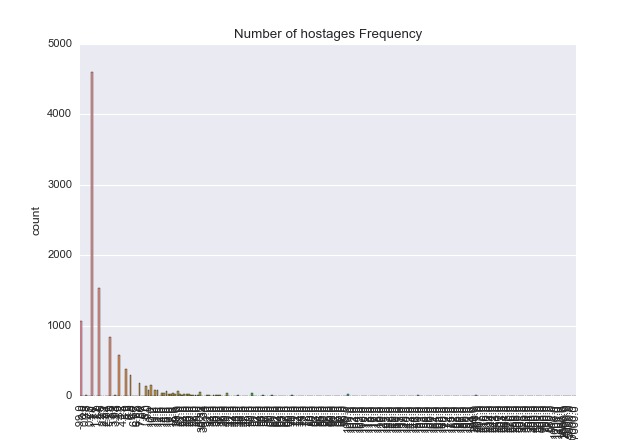

In [216]:
# Start with Column 112.  Number of hostages.
# Needs cleaning to convert to whole numbers.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[112]
print(curr)
curr_column = dfs[curr]

unique_nhostkid, nhostkid_counts = np.unique(curr_column, return_counts=True)

print(unique_nhostkid)
print(nhostkid_counts)

nan_count = 0
unknown_count = 0
for nhostkid in curr_column:
    if str(nhostkid) == "nan":
        nan_count += 1
    elif nhostkid == -99:
        unknown_count += 1
print("Number of missing data: " + str(nan_count))
print("Number of unknown data: " + str(unknown_count))
  
#Check if any row is missing the region name
total = np.sum(nhostkid_counts)
if total_entries == total:
    print("Sum of nhostkid frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Number of hostages Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

nhostkidus
[-99.  -9.   0. ...,  nan  nan  nan]
[   56     3 10790 ...,     1     1     1]
Number of missing data: 145559
Number of unknown data: 56
Sum of nhostkid us frequencies = Number of total entries


<IPython.core.display.Javascript object>


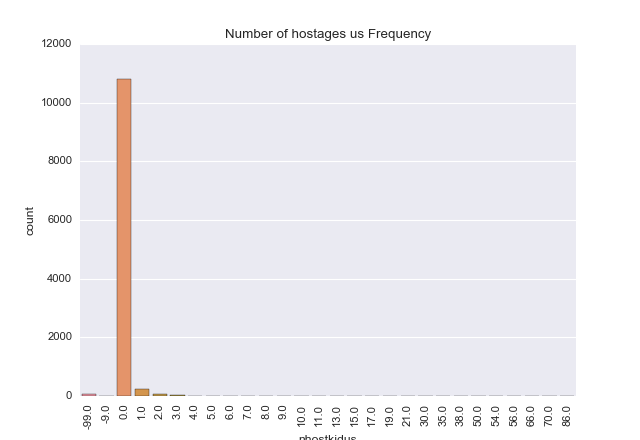

In [217]:
# Start with Column 113.  Number of hostages from us.
# Needs cleaning to convert to whole numbers.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[113]
print(curr)
curr_column = dfs[curr]

unique_nhostkid, nhostkid_counts = np.unique(curr_column, return_counts=True)

print(unique_nhostkid)
print(nhostkid_counts)

nan_count = 0
unknown_count = 0
for nhostkid in curr_column:
    if str(nhostkid) == "nan":
        nan_count += 1
    elif nhostkid == -99:
        unknown_count += 1
print("Number of missing data: " + str(nan_count))
print("Number of unknown data: " + str(unknown_count))
  
#Check if any row is missing the region name
total = np.sum(nhostkid_counts)
if total_entries == total:
    print("Sum of nhostkid us frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Number of hostages us Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

nhours
[-99.  -9.   0. ...,  nan  nan  nan]
[1434   25 1292 ...,    1    1    1]
Number of missing data: 153470
Number of unknown data: 1459
Sum of hours frequencies = Number of total entries


<IPython.core.display.Javascript object>


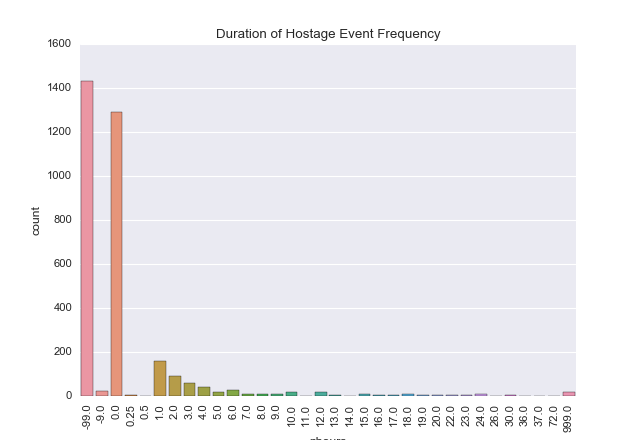

In [218]:
# Start with Column 114.  Duration of hostage scenario.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[114]
print(curr)
curr_column = dfs[curr]

unique_hours, hour_counts = np.unique(curr_column, return_counts=True)

print(unique_hours)
print(hour_counts)

nan_count = 0
unknown_count = 0
for hour in curr_column:
    if str(hour) == "nan":
        nan_count += 1
    elif hour < 0:
        unknown_count += 1
print("Number of missing data: " + str(nan_count))
print("Number of unknown data: " + str(unknown_count))
  
#Check if any row is missing the region name
total = np.sum(hour_counts)
if total_entries == total:
    print("Sum of hours frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Duration of Hostage Event Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

ndays
[-99.  -9.   0. ...,  nan  nan  nan]
[3252   15  224 ...,    1    1    1]
Number of missing data: 150190
Number of unknown data: 3267
Sum of day frequencies = Number of total entries


<IPython.core.display.Javascript object>


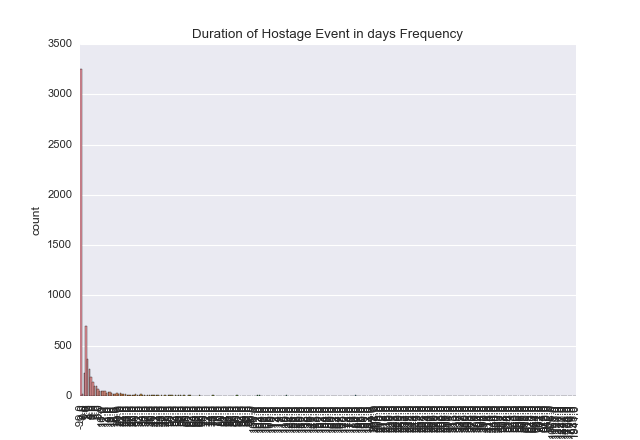

In [219]:
# Start with Column 115.  Duration of hostage scenario in days. Need to form clusters based on lengths. 
# TOo many differnet lengths in days.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[115]
print(curr)
curr_column = dfs[curr]

unique_days, day_counts = np.unique(curr_column, return_counts=True)

print(unique_days)
print(day_counts)

nan_count = 0
unknown_count = 0
for day in curr_column:
    if str(day) == "nan":
        nan_count += 1
    elif day < 0:
        unknown_count += 1
print("Number of missing data: " + str(nan_count))
print("Number of unknown data: " + str(unknown_count))
  
#Check if any row is missing the region name
total = np.sum(day_counts)
if total_entries == total:
    print("Sum of day frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Duration of Hostage Event in days Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [224]:
# Start with Column 116. Country that perps diverted to in hostage kidnapping events. 

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
import operator

curr = columns[116]
print(curr)
curr_column = dfs[curr]

divert_dict = {}

nan_count = 0
for country in curr_column:
    if str(country) == "nan":
        nan_count += 1
    else:
        if str(country) in divert_dict:
            divert_dict[str(country)] += 1
        else:
            divert_dict[str(country)] = 1
    
print("Number of missing data: " + str(nan_count))
print(sorted(divert_dict.items(), key=operator.itemgetter(1), reverse=True))
#Check if any row is missing the region name
total = sum(divert_dict.values()) 
if total_entries == total + nan_count:
    print("Sum of country frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

divert
Number of missing data: 156483
[('Unknown', 27), ('Libya', 11), ('Afghanistan', 9), ('Iraq', 9), ('Colombia', 7), ('Beirut', 6), ('Djibouti', 6), ('Bangladesh', 6), ('Mali', 6), ('Nepal', 5), ('Philippines', 5), ('Pakistan', 5), ('Iran', 4), ('Russia', 4), ('Sudan', 4), ('France', 4), ('Bulgaria', 4), ('Cuba', 4), ('Nigeria', 4), ('Central African Republic', 4), ('Jordan', 4), ('Somalia', 4), ('Guatemala city, Panama, Havana', 3), ('Saudi Arabia', 3), ('Cyprus', 3), ('India', 3), ('Spain', 3), ('Paris', 2), ('United Arab Emirates', 2), ('Teheran', 2), ('Netherlands', 2), ('Tunisia', 2), ('Lebanon', 2), ('Turkey', 2), ('Malta', 2), ('Nairobi, Kenya', 2), ('Peru', 2), ('Angola', 2), ('Yemen', 2), ('Italy', 2), ('Chad', 2), ('China', 2), ('not stated', 2), ('Algeria', 2), ('Taiwan', 1), ('Salonika', 1), ('Alicante, Spain', 1), ('Nairobi, Kenya, Jidda, Saudi Arabia, Athens, *', 1), ('Managua Nicaragua to Panama', 1), ('Israel', 1), ('Syria', 1), ('Trinidad-This; Aruba-12 hrs; Curaca

In [227]:
# Start with Column 117. Country where hostage kidnapping events occurred. 

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
import operator

curr = columns[117]
print(curr)
curr_column = dfs[curr]

kidhij_dict = {}

nan_count = 0
for country in curr_column:
    if str(country) == "nan":
        nan_count += 1
    else:
        if str(country) in kidhij_dict:
            kidhij_dict[str(country)] += 1
        else:
            kidhij_dict[str(country)] = 1
    
print("Number of missing data: " + str(nan_count))
print(sorted(kidhij_dict.items(), key=operator.itemgetter(1), reverse=True))
#Check if any row is missing the region name
total = sum(kidhij_dict.values()) 
if total_entries == total + nan_count:
    print("Sum of country frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

kidhijcountry
Number of missing data: 153482
[('Colombia', 687), ('Guatemala', 204), ('Philippines', 182), ('India', 143), ('Lebanon', 139), ('El Salvador', 119), ('Spain', 96), ('Unknown', 88), ('Peru', 81), ('Mexico', 79), ('Pakistan', 73), ('Argentina', 71), ('Italy', 64), ('Nicaragua', 60), ('Turkey', 52), ('Sri Lanka', 52), ('Russia', 51), ('Venezuela', 49), ('Somalia', 46), ('Northern Ireland', 46), ('Algeria', 45), ('Brazil', 41), ('Yemen', 32), ('Cambodia', 31), ('Afghanistan', 31), ('Iraq', 28), ('West Bank and Gaza Strip', 28), ('Ethiopia', 24), ('Honduras', 21), ('Israel', 19), ('Chile', 19), ('Bangladesh', 18), ('Ecuador', 17), ('Sudan', 15), ('Ireland', 15), ('Tajikistan', 14), ('Mozambique', 14), ('Angola', 14), ('China', 13), ('France', 13), ('Iran', 12), ('Libya', 12), ('Cuba', 11), ('Uruguay', 11), ('Bolivia', 11), ('Thailand', 9), ('Jordan', 9), ('Haiti', 9), ('Nigeria', 9), ('Indonesia', 8), ('Djibouti', 8), ('Great Britain', 7), ('Papua New Guinea', 7), ('Namibia', 

ransom
[ -9.   0.   1. ...,  nan  nan  nan]
[ 1326 72620  1146 ...,     1     1     1]
Number of missing data: 81680
Number of unknown data: 1326
Sum of ishostkid frequencies = Number of total entries


<IPython.core.display.Javascript object>


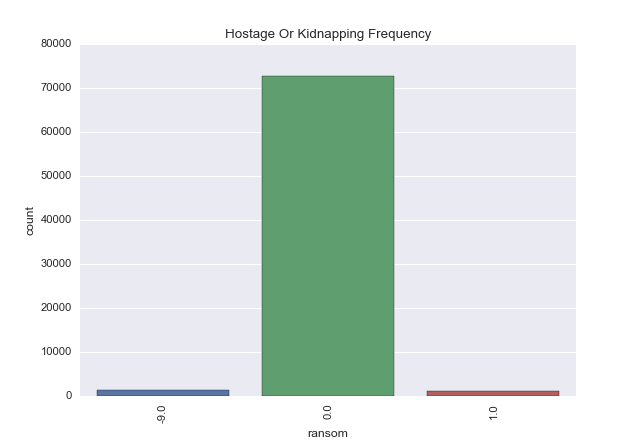

In [228]:
# Start with Column 118.  Is ransom demanded
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[118]
print(curr)
curr_column = dfs[curr]

unique_isransom, isransom_counts = np.unique(curr_column, return_counts=True)

print(unique_isransom)
print(isransom_counts)

nan_count = 0
unknown_count = 0
for ishostkid in curr_column:
    if str(ishostkid) == "nan":
        nan_count += 1
    elif ishostkid < 0:
        unknown_count += 1
print("Number of missing data: " + str(nan_count))
print("Number of unknown data: " + str(unknown_count))
  
#Check if any row is missing the region name
total = np.sum(isransom_counts)
if total_entries == total:
    print("Sum of ishostkid frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Hostage Or Kidnapping Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

In [230]:
# Start with Column 119. and 120. Dollar value of ransom demanded. Dollar value of ransom demanded from US sources.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[119]
sec = columns[120]
curr_column = dfs[curr]
print(curr)
sec_column = dfs[sec]
print(sec)

unique_ransoms, ransom_counts = np.unique(curr_column, return_counts=True)
print(unique_ransoms)
print(ransom_counts)
print("From US Sources")
uniqueus_ransoms, ransomus_counts = np.unique(sec_column, return_counts=True)
print(uniqueus_ransoms)
print(ransomus_counts)

nan1_count = 0
unknown1_count = 0

nan2_count = 0
unknown2_count = 0

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan":
        nan1_count += 1
    elif curr_column[index] <0:
        unknown1_count += 1
    if str(sec_column[index]) == "nan":
        nan2_count += 1
    elif sec_column[index] <0:
        unknown2_count += 1

print("Missing values: " + str(nan1_count))
print("Unknown values: " + str(unknown1_count))

print("Missing us values: " + str(nan2_count))
print("Unknown us values: " + str(unknown2_count))

ransomamt
ransomamtus
[-99.  -9.   0. ...,  nan  nan  nan]
[207   3 338 ...,   1   1   1]
From US Sources
[  -99.       0.    1193.65 ...,      nan      nan      nan]
[ 23 363   1 ...,   1   1   1]
Missing values: 155577
Unknown values: 210
Missing us values: 156361
Unknown us values: 23


In [231]:
# Start with Column 121. and 122. Dollar value of ransom paid. Dollar value of ransom paid by US sources.

%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[121]
sec = columns[122]
curr_column = dfs[curr]
print(curr)
sec_column = dfs[sec]
print(sec)

unique_ransoms, ransom_counts = np.unique(curr_column, return_counts=True)
print(unique_ransoms)
print(ransom_counts)
print("From US Sources")
uniqueus_ransoms, ransomus_counts = np.unique(sec_column, return_counts=True)
print(uniqueus_ransoms)
print(ransomus_counts)

nan1_count = 0
unknown1_count = 0

nan2_count = 0
unknown2_count = 0

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan":
        nan1_count += 1
    elif curr_column[index] <0:
        unknown1_count += 1
    if str(sec_column[index]) == "nan":
        nan2_count += 1
    elif sec_column[index] <0:
        unknown2_count += 1

print("Missing values: " + str(nan1_count))
print("Unknown values: " + str(unknown1_count))

print("Missing us values: " + str(nan2_count))
print("Unknown us values: " + str(unknown2_count))

ransompaid
ransompaidus
[-99.  -9.   0. ...,  nan  nan  nan]
[252   1 204 ...,   1   1   1]
From US Sources
[-99.  -9.   0. ...,  nan  nan  nan]
[ 23   1 373 ...,   1   1   1]
Missing values: 156149
Unknown values: 253
Missing us values: 156370
Unknown us values: 24


hostkidoutcome
hostkidoutcome_txt
[  1.   2.   3. ...,  nan  nan  nan]
[  14 2567  142 ...,    1    1    1]
['.' 'Attempted Rescue' 'Combination'
 'Hostage(s) escaped (not during rescue attempt)'
 'Hostage(s) killed (not during rescue attempt)'
 'Hostage(s) released by perpetrators' 'Successful Rescue' 'Unknown']
[148087     14    770    142   1929   2567    434   2829]
Sum of outcome frequencies = Number of total entries


<IPython.core.display.Javascript object>


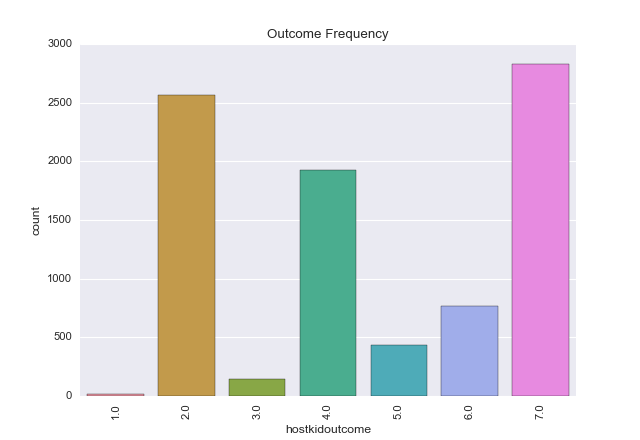

In [232]:
# Start with Column 124 and 125. Outcome of hostage scenario. Outcome text.
#1 = Attempted Rescue
#2 = Hostage(s) released by perpetrators
#3 = Hostage(s) escaped (not during rescue attempt)
#4 = Hostage(s) killed (not during rescue attempt)
#5 = Successful Rescue
#6 = Combination
#7 = Unknown
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[124]
sec = columns[125]
print(curr)
print(sec)
curr_column = dfs[curr]
sec_column = dfs[sec]

unique_outcomes, outcome_counts = np.unique(curr_column, return_counts=True)
unique_outcomes_txt, outcome_counts_txt = np.unique(sec_column, return_counts=True)

print(unique_outcomes)
print(outcome_counts)
print(unique_outcomes_txt)
print(outcome_counts_txt)

for index in range(0,total_entries):
    if str(curr_column[index]) == "nan" and str(sec_column[index]) != ".":
        print("Outcome text present but outcome code is nan. Index = " + str(index))
    elif str(sec_column[index]) == "." and str(curr_column[index]) != "nan":
        print("Outcome code present but Outcome text is .. Index = " + str(index))
    
#Check if any row is missing the region name
total = np.sum(outcome_counts_txt)
if total_entries == total:
    print("Sum of outcome frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Outcome Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

nreleased
[-99.     0.     0.33 ...,    nan    nan    nan]
[2663 1709    6 ...,    1    1    1]
Number of missing data: 148677
Number of unknown data: 0
Sum of num frequencies = Number of total entries


<IPython.core.display.Javascript object>


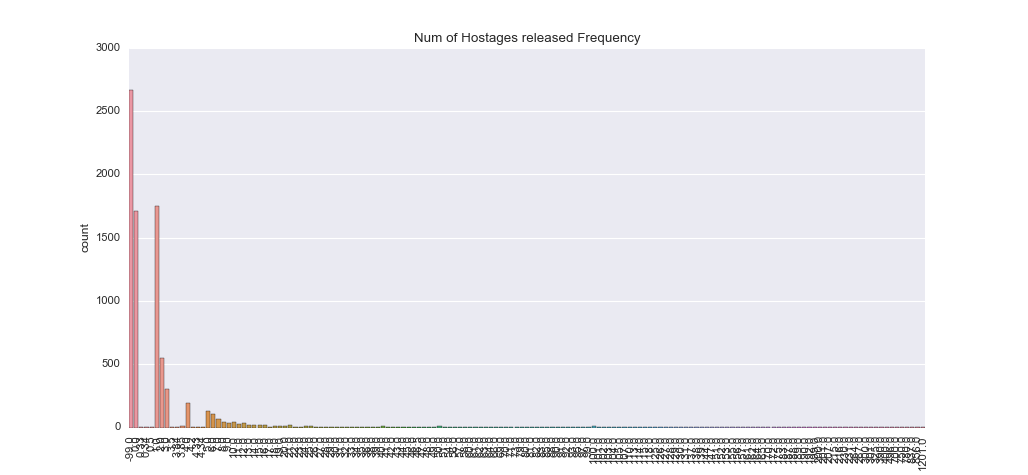

In [233]:
# Start with Column 126.  Number of hostages released
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[126]
print(curr)
curr_column = dfs[curr]

unique_num, num_counts = np.unique(curr_column, return_counts=True)

print(unique_num)
print(num_counts)

nan_count = 0
unknown_count = 0
for num in curr_column:
    if str(num) == "nan":
        nan_count += 1
    elif ishostkid < 0:
        unknown_count += 1
print("Number of missing data: " + str(nan_count))
print("Number of unknown data: " + str(unknown_count))
  
#Check if any row is missing the region name
total = np.sum(num_counts)
if total_entries == total:
    print("Sum of num frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("Num of Hostages released Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

INT_LOG
[-9  0  1]
[84864 66069  5839]
Number of missing data: 0
Number of unknown data: 84864
Sum of islog frequencies = Number of total entries


<IPython.core.display.Javascript object>


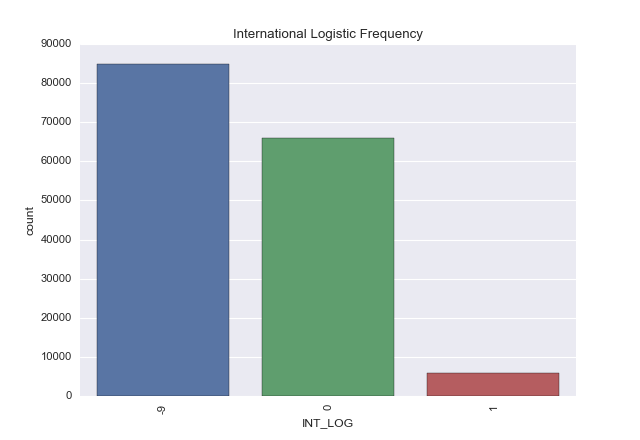

In [234]:
# Start with Column 132.  International-Logistical. 1 = "Yes" The attack was logistically international; 
# the nationality of the perpetrator group differs from the location of the attack.
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[132]
print(curr)
curr_column = dfs[curr]

unique_islog, islog_counts = np.unique(curr_column, return_counts=True)

print(unique_islog)
print(islog_counts)

nan_count = 0
unknown_count = 0
for islog in curr_column:
    if str(islog) == "nan":
        nan_count += 1
    elif islog < 0:
        unknown_count += 1
print("Number of missing data: " + str(nan_count))
print("Number of unknown data: " + str(unknown_count))
  
#Check if any row is missing the region name
total = np.sum(islog_counts)
if total_entries == total:
    print("Sum of islog frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("International Logistic Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

INT_IDEO
[-9  0  1]
[84989 57681 14102]
Number of missing data: 0
Number of unknown data: 84989
Sum of isintllog frequencies = Number of total entries


<IPython.core.display.Javascript object>


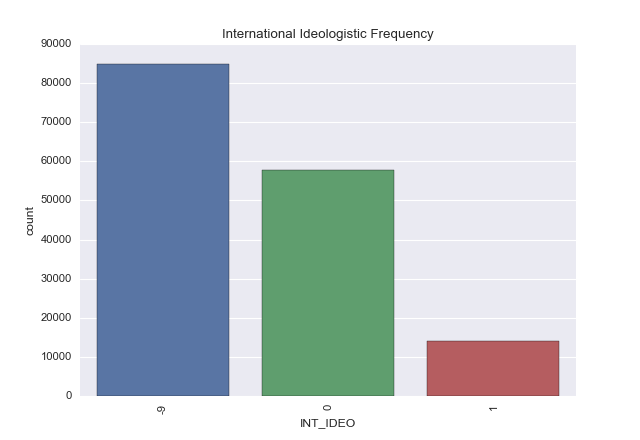

In [235]:
# Start with Column 133.  International-Ideological. 1 - The attack was ideologically international; the nationality of
# the perpetrator group differs from the nationality of the target(s)/victim(s)
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[133]
print(curr)
curr_column = dfs[curr]

unique_isintl, isintl_counts = np.unique(curr_column, return_counts=True)

print(unique_isintl)
print(isintl_counts)

nan_count = 0
unknown_count = 0
for islog in curr_column:
    if str(islog) == "nan":
        nan_count += 1
    elif islog < 0:
        unknown_count += 1
print("Number of missing data: " + str(nan_count))
print("Number of unknown data: " + str(unknown_count))
  
#Check if any row is missing the region name
total = np.sum(isintl_counts)
if total_entries == total:
    print("Sum of isintllog frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("International Ideologistic Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

INT_MISC
[-9  0  1]
[   484 137212  19076]
Number of missing data: 0
Number of unknown data: 484
Sum of isintlmisc frequencies = Number of total entries


<IPython.core.display.Javascript object>


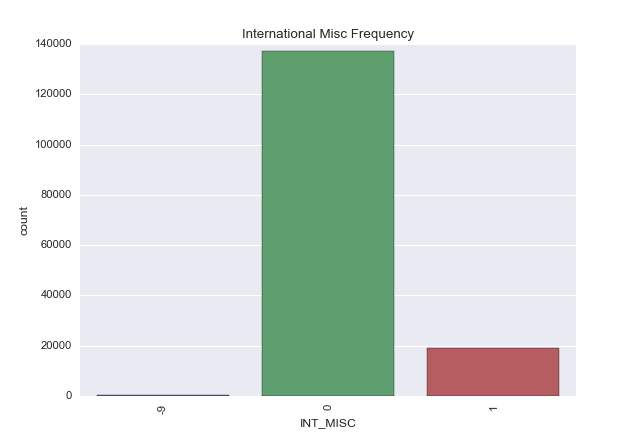

In [236]:
# Start with Column 134.  International-Misc. 1 - he location of the attack differs from the nationality of the 
# target(s)/victim(s)
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[134]
print(curr)
curr_column = dfs[curr]

unique_isintl, isintl_counts = np.unique(curr_column, return_counts=True)

print(unique_isintl)
print(isintl_counts)

nan_count = 0
unknown_count = 0
for islog in curr_column:
    if str(islog) == "nan":
        nan_count += 1
    elif islog < 0:
        unknown_count += 1
print("Number of missing data: " + str(nan_count))
print("Number of unknown data: " + str(unknown_count))
  
#Check if any row is missing the region name
total = np.sum(isintl_counts)
if total_entries == total:
    print("Sum of isintlmisc frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("International Misc Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)

INT_ANY
[-9  0  1]
[76642 52106 28024]
Number of missing data: 0
Number of unknown data: 76642
Sum of is intl frequencies = Number of total entries


<IPython.core.display.Javascript object>


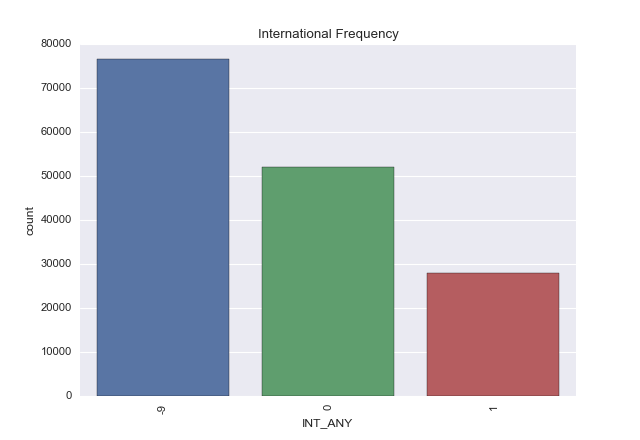

In [238]:
# Start with Column 135.  International-AnyOfTheAbove. 1 - Attack is international based on any of the above
%matplotlib notebook
import seaborn as sns
import matplotlib as mp
curr = columns[135]
print(curr)
curr_column = dfs[curr]

unique_isintl, isintl_counts = np.unique(curr_column, return_counts=True)

print(unique_isintl)
print(isintl_counts)

nan_count = 0
unknown_count = 0
for islog in curr_column:
    if str(islog) == "nan":
        nan_count += 1
    elif islog < 0:
        unknown_count += 1
print("Number of missing data: " + str(nan_count))
print("Number of unknown data: " + str(unknown_count))
  
#Check if any row is missing the region name
total = np.sum(isintl_counts)
if total_entries == total:
    print("Sum of is intl frequencies = Number of total entries")
else:
    print("Achtung!! Cumulative frequency mismatch.")

ax = sns.countplot(curr_column)
mp.pyplot.title("International Frequency")
_ = mp.pyplot.setp(ax.get_xticklabels(), rotation=90)